In [1]:
library(survivalROC)

Warning message:
"package 'survivalROC' was built under R version 4.0.3"


In [2]:
data<- read.csv('score-train.csv',sep=',')
nobs=NROW(data)
data$OS<-data$OS*30
data$DFS<-data$DFS*30
head(data)

,Num,Y1,OS,Y2,DFS,CSOS,CSDFS,RSOS,RSDFS
,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,626,0,337,-0.23863495,-0.26249698,0.11873860,0.2014294
2,2,1,2240,0,948,-0.14046747,-0.10469514,0.07578419,0.1513460
3,3,1,1759,1,1759,-0.23863495,-0.26249698,0.11509943,0.1688970
4,4,1,1756,1,1756,0.07073490,0.05623062,0.16582503,0.3293500
5,5,0,1213,0,413,0.04695314,0.05623062,-0.07379806,-0.2466234
6,6,1,2849,1,2849,-0.23863495,-0.22231370,-0.11292887,-0.0331718


In [3]:
data

Num,Y1,OS,Y2,DFS,CSOS,CSDFS,RSOS,RSDFS
<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,626,0,337,-0.238634953,-0.26249698,0.118738598,0.201429410
2,1,2240,0,948,-0.140467473,-0.10469514,0.075784194,0.151345980
3,1,1759,1,1759,-0.238634953,-0.26249698,0.115099428,0.168896961
4,1,1756,1,1756,0.070734901,0.05623062,0.165825029,0.329349961
5,0,1213,0,413,0.046953137,0.05623062,-0.073798064,-0.246623378
6,1,2849,1,2849,-0.238634953,-0.22231370,-0.112928875,-0.033171797
7,1,1561,1,1561,0.192684144,0.21403246,-0.044671391,-0.256112323
8,1,994,1,994,-0.000610391,0.05623062,-0.112153856,-0.219901794
9,0,629,0,380,0.046953137,0.05623062,-0.021276215,0.000871266


# 2-year OS

### Clinical Score

In [4]:
cutoff=730 #730, 1095, 1825, 2555, 3650
data2= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$CSOS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data2)## list结构

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 0.863 0.828 0.755 0.276 ...
 $ FP          : num [1:20] 1 0.938 0.924 0.893 0.72 ...
 $ predict.time: num 730
 $ Survival    : num 0.986
 $ AUC         : num 0.24


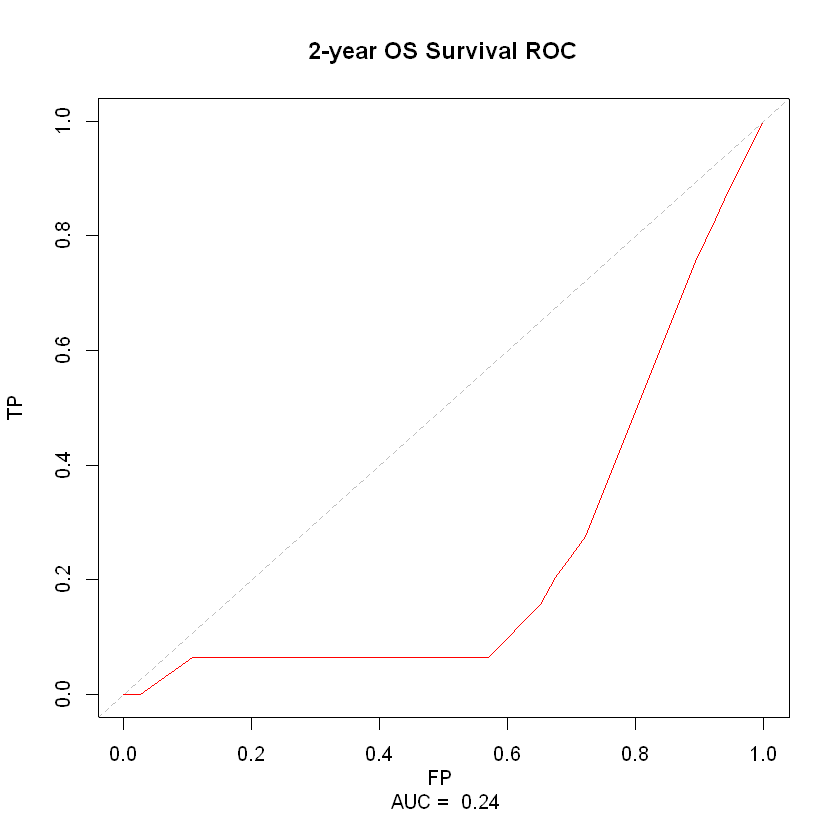

In [5]:
plot(data2$FP, data2$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data2$AUC,3)), ##连接
     ylab="TP",
     main="2-year OS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [6]:
data2= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$CSOS,     
                     predict.time =  cutoff, method="KM")
str(data2)

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 0.752 0.752 0.753 0.248 ...
 $ FP          : num [1:20] 1 0.939 0.925 0.892 0.721 ...
 $ predict.time: num 730
 $ Survival    : num 0.986
 $ AUC         : num 0.202


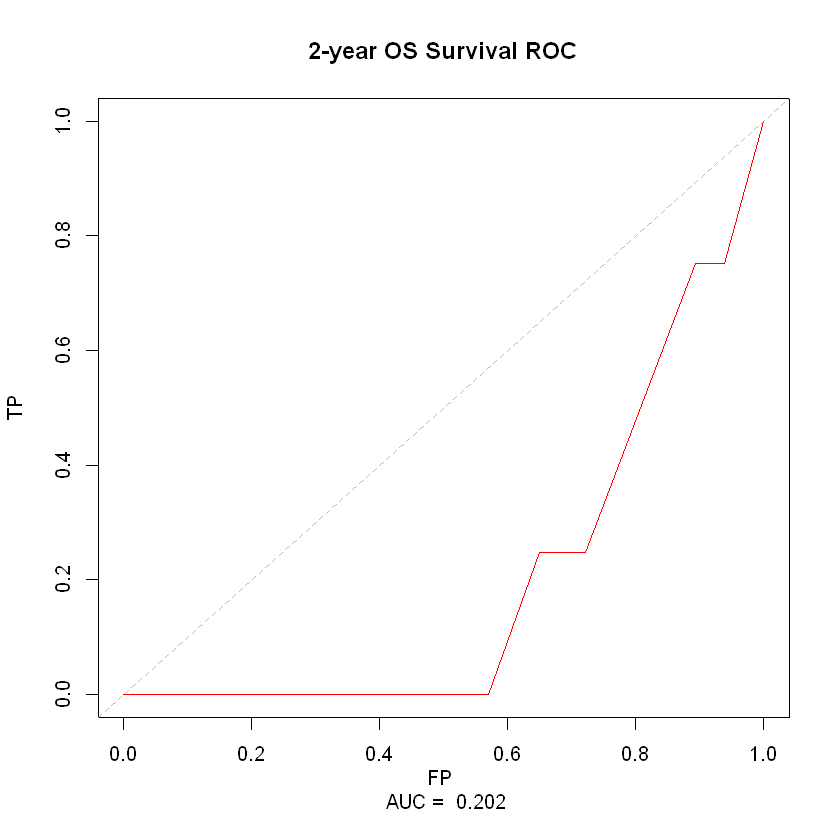

In [7]:
plot(data2$FP, data2$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data2$AUC,3)), 
     ylab="TP",
     main="2-year OS Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [8]:
data2= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$RSOS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data2)## list结构

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 0.988 0.976 0.965 0.954 ...
 $ FP          : num [1:284] 1 0.997 0.993 0.99 0.986 ...
 $ predict.time: num 730
 $ Survival    : num 0.986
 $ AUC         : num 0.575


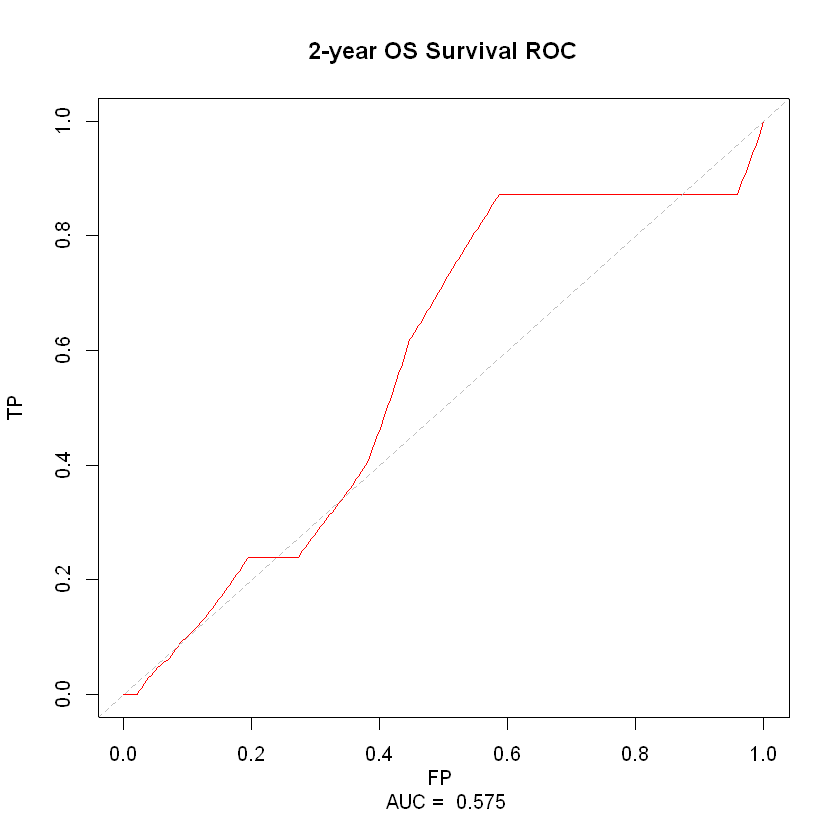

In [9]:
plot(data2$FP, data2$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data2$AUC,3)), ##连接
     ylab="TP",
     main="2-year OS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [10]:
data2= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$RSOS,     
                     predict.time =  cutoff, method="KM")
str(data2)

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 1 1 1 1 ...
 $ FP          : num [1:284] 1 0.996 0.993 0.989 0.986 ...
 $ predict.time: num 730
 $ Survival    : num 0.986
 $ AUC         : num 0.509


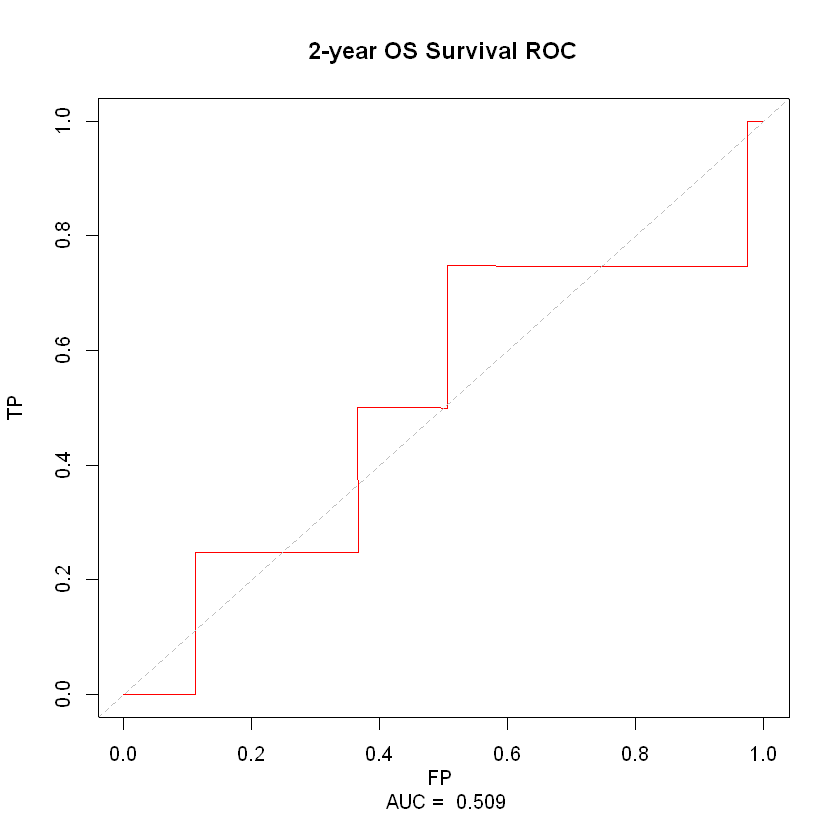

In [11]:
plot(data2$FP, data2$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data2$AUC,3)), 
     ylab="TP",
     main="2-year OS Survival ROC")
abline(0,1,col="gray",lty=2)

# 2-year DFS

### Clinical Score

In [12]:
data2= survivalROC(  Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$CSDFS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data2)## list结构

List of 6
 $ cut.values  : num [1:11] -Inf -0.2625 -0.2223 -0.1047 -0.0645 ...
 $ TP          : num [1:11] 1 0.0605 0.00654 0.00654 0.00654 ...
 $ FP          : num [1:11] 1 0.744 0.72 0.577 0.566 ...
 $ predict.time: num 730
 $ Survival    : num 0.993
 $ AUC         : num 0.141


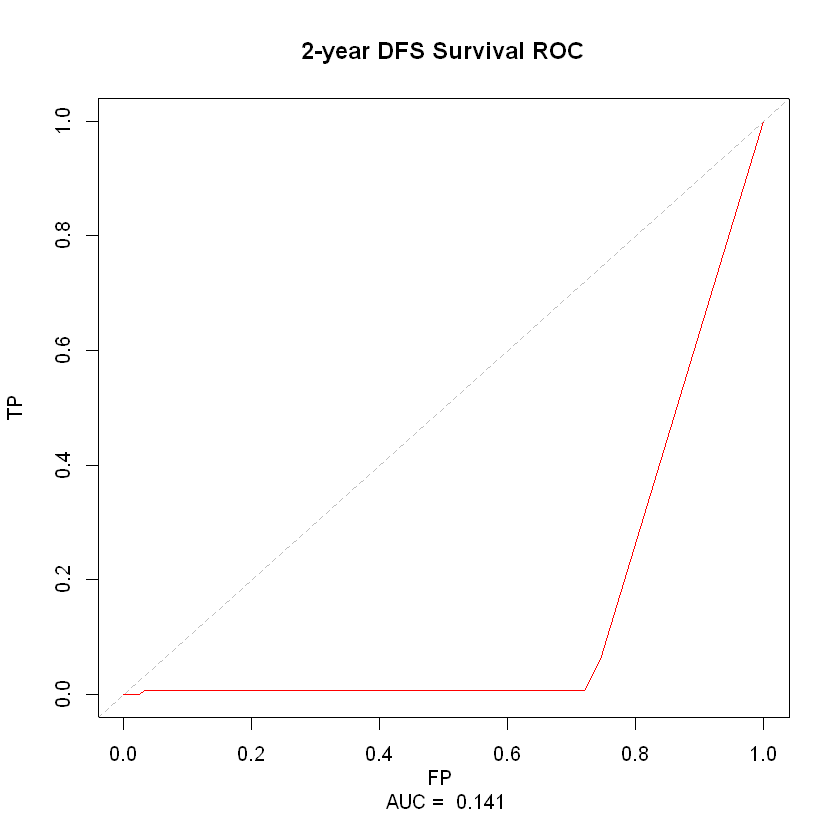

In [13]:
plot(data2$FP, data2$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data2$AUC,3)), ##连接
     ylab="TP",
     main="2-year DFS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [14]:
data2= survivalROC(  Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$CSDFS,     
                     predict.time =  cutoff, method="KM")
str(data2)

List of 6
 $ cut.values  : num [1:11] -Inf -0.2625 -0.2223 -0.1047 -0.0645 ...
 $ TP          : num [1:11] 1 0 0 0 0 0 0 0 0 0 ...
 $ FP          : num [1:11] 1 0.744 0.719 0.577 0.566 ...
 $ predict.time: num 730
 $ Survival    : num 0.993
 $ AUC         : num 0.128


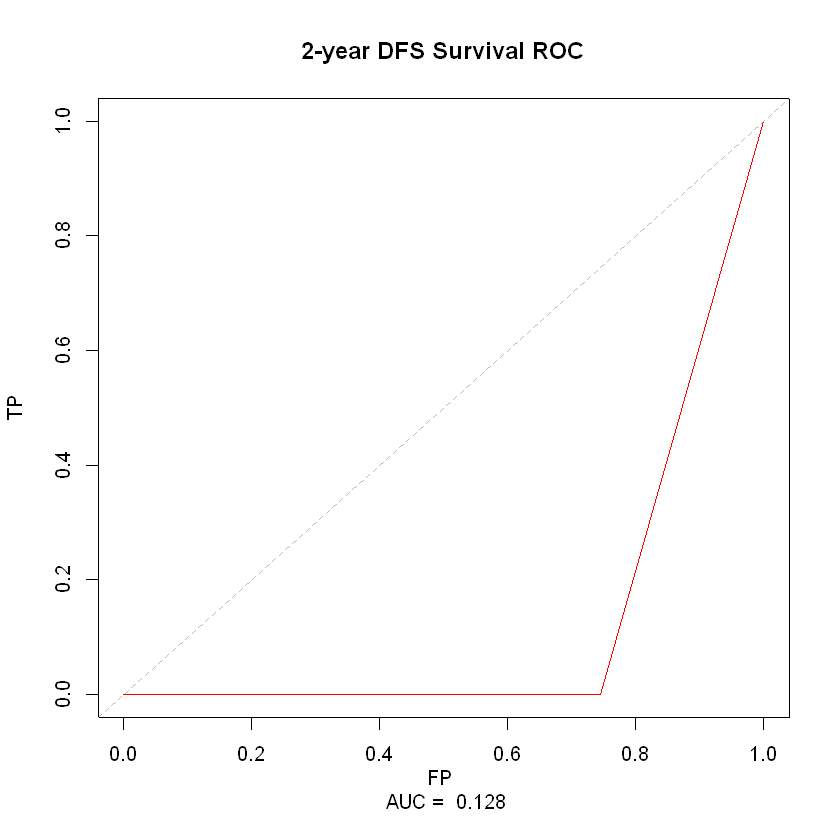

In [15]:
plot(data2$FP, data2$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data2$AUC,3)), 
     ylab="TP",
     main="2-year DFS Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [16]:
data2= survivalROC(  Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$RSDFS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data2)## list结构

List of 6
 $ cut.values  : num [1:284] -Inf -0.788 -0.746 -0.543 -0.542 ...
 $ TP          : num [1:284] 1 0.96 0.922 0.885 0.848 ...
 $ FP          : num [1:284] 1 0.997 0.993 0.99 0.986 ...
 $ predict.time: num 730
 $ Survival    : num 0.993
 $ AUC         : num 0.538


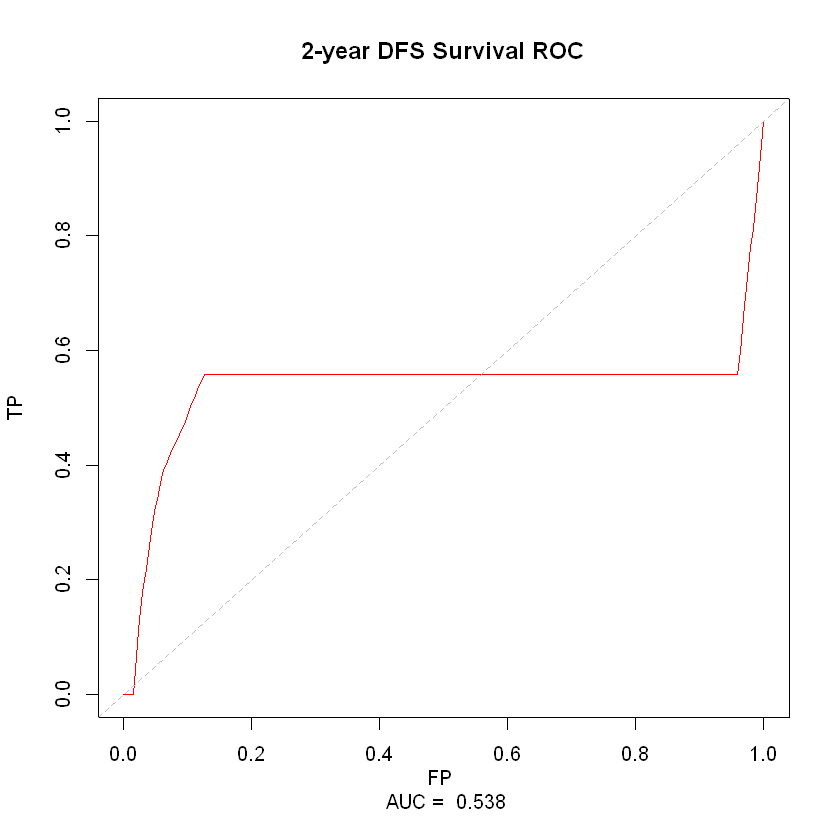

In [17]:
plot(data2$FP, data2$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data2$AUC,3)), ##连接
     ylab="TP",
     main="2-year DFS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [18]:
data2= survivalROC(  Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$RSDFS,     
                     predict.time =  cutoff, method="KM")
str(data2)

List of 6
 $ cut.values  : num [1:284] -Inf -0.788 -0.746 -0.543 -0.542 ...
 $ TP          : num [1:284] 1 1 1 1 1 ...
 $ FP          : num [1:284] 1 0.996 0.993 0.989 0.986 ...
 $ predict.time: num 730
 $ Survival    : num 0.993
 $ AUC         : num 0.482


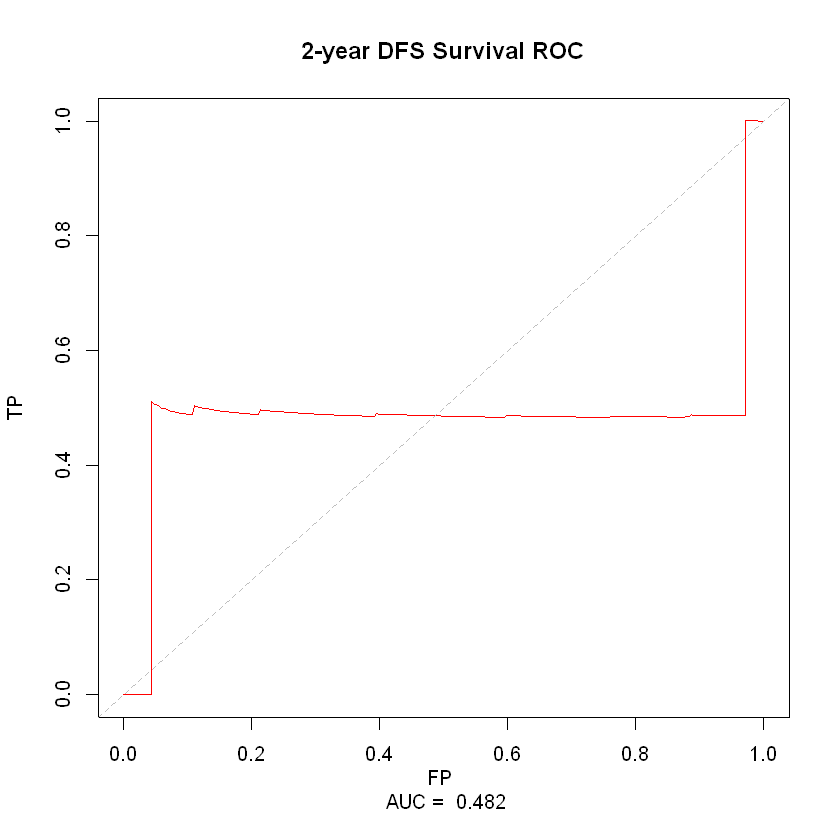

In [19]:
plot(data2$FP, data2$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data2$AUC,3)), 
     ylab="TP",
     main="2-year DFS Survival ROC")
abline(0,1,col="gray",lty=2)

# 3-year OS

### Clinical Score

In [20]:
cutoff=1095 #730, 1095, 1825, 2555, 3650
data3= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$CSOS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data3)## list结构

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 0.912 0.895 0.864 0.666 ...
 $ FP          : num [1:20] 1 0.939 0.925 0.893 0.718 ...
 $ predict.time: num 1095
 $ Survival    : num 0.923
 $ AUC         : num 0.465


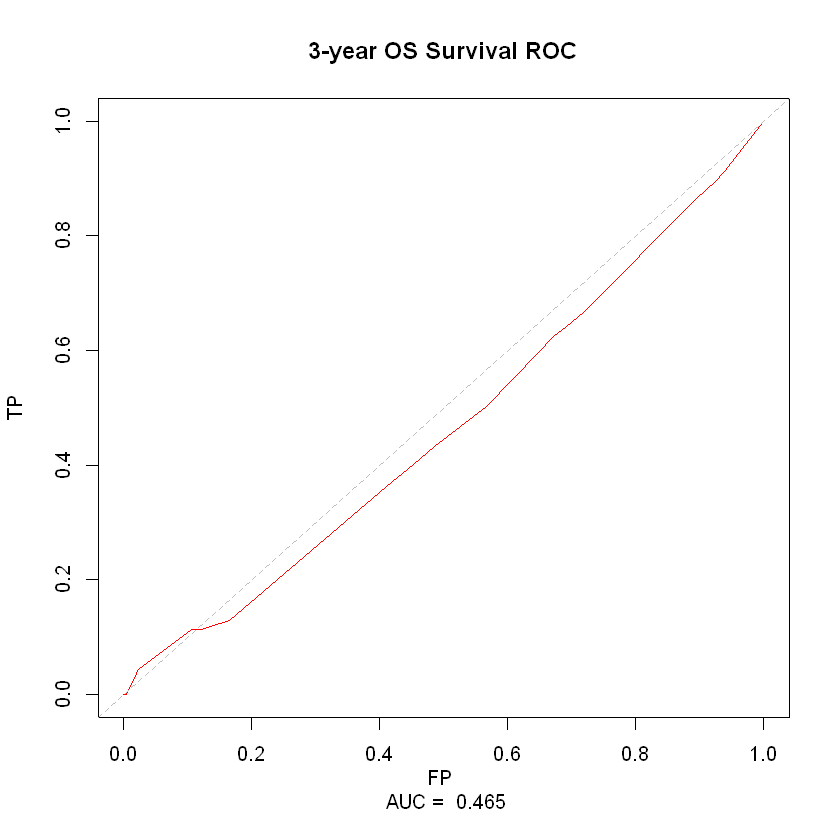

In [21]:
plot(data3$FP, data3$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data3$AUC,3)), ##连接
     ylab="TP",
     main="3-year OS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [22]:
data3= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$CSOS,     
                     predict.time =  cutoff, method="KM")
str(data3)

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 0.849 0.85 0.844 0.638 ...
 $ FP          : num [1:20] 1 0.944 0.928 0.894 0.72 ...
 $ predict.time: num 1095
 $ Survival    : num 0.923
 $ AUC         : num 0.444


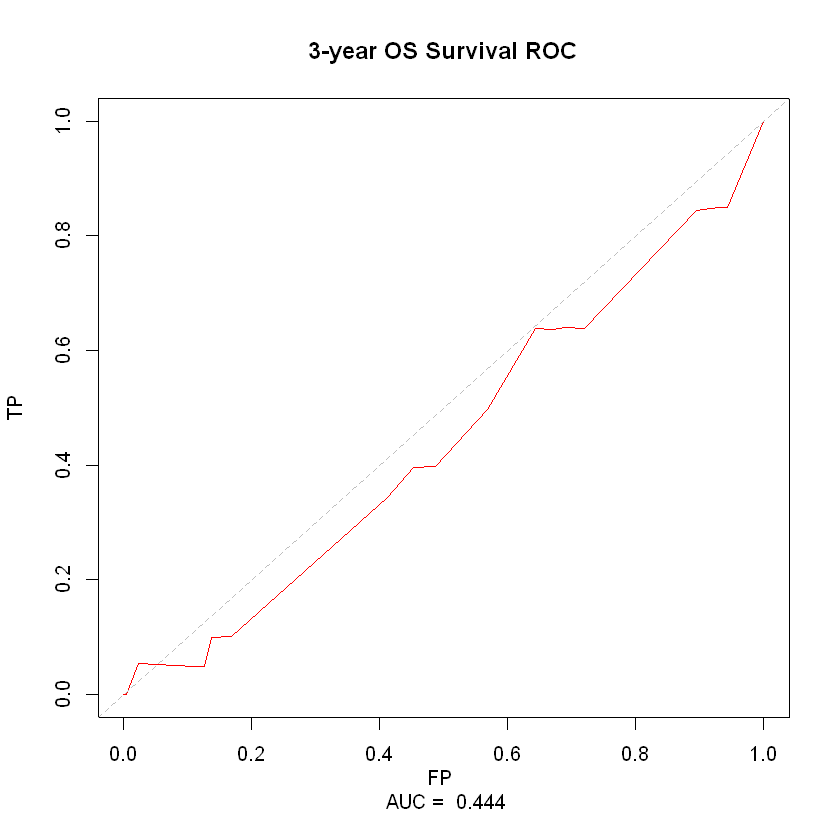

In [23]:
plot(data3$FP, data3$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data3$AUC,3)), 
     ylab="TP",
     main="3-year OS Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [24]:
cutoff=1095 #730, 1095, 1825, 2555, 3650
data3= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$RSOS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data3)## list结构

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 0.998 0.996 0.994 0.993 ...
 $ FP          : num [1:284] 1 0.996 0.993 0.989 0.985 ...
 $ predict.time: num 1095
 $ Survival    : num 0.923
 $ AUC         : num 0.517


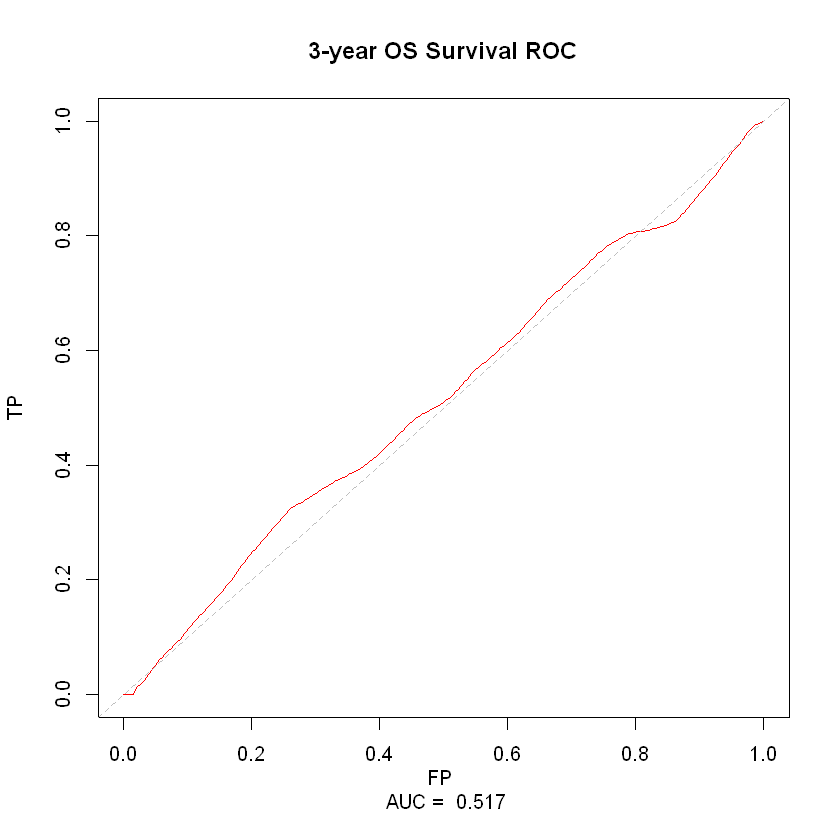

In [25]:
plot(data3$FP, data3$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data3$AUC,3)), ##连接
     ylab="TP",
     main="3-year OS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [26]:
data3= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$RSOS,     
                     predict.time =  cutoff, method="KM")
str(data3)

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 1 1 1 1 ...
 $ FP          : num [1:284] 1 0.996 0.992 0.988 0.985 ...
 $ predict.time: num 1095
 $ Survival    : num 0.923
 $ AUC         : num 0.531


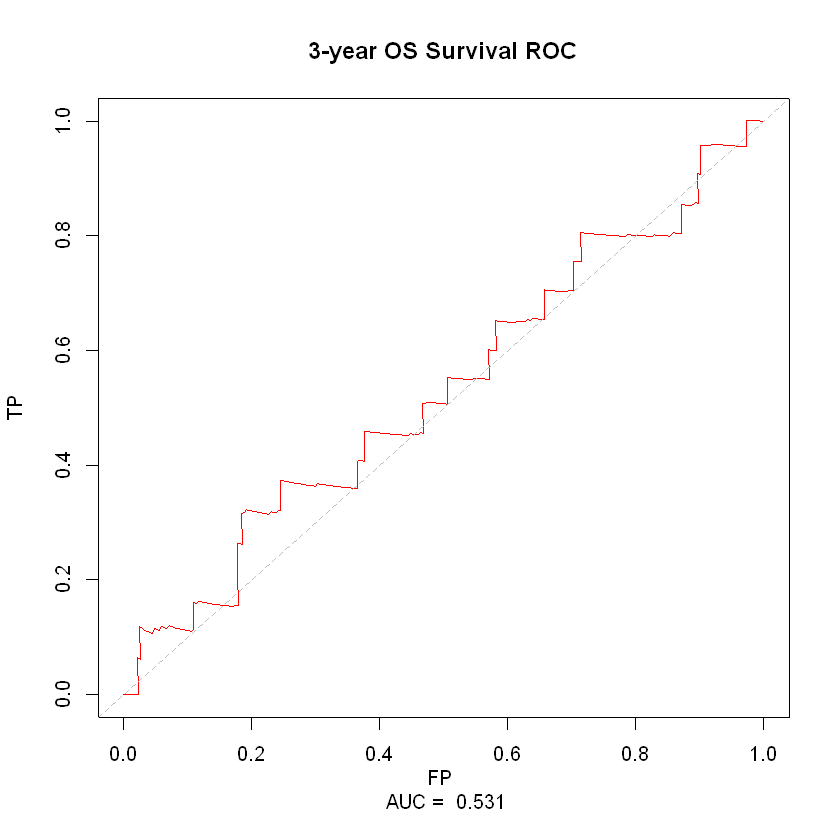

In [27]:
plot(data3$FP, data3$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data3$AUC,3)), 
     ylab="TP",
     main="3-year OS Survival ROC")
abline(0,1,col="gray",lty=2)

# 3-year DFS

### Clinical Score

In [28]:
cutoff=1095 #730, 1095, 1825, 2555, 3650
data3= survivalROC(  Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$CSDFS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data3)## list结构

List of 6
 $ cut.values  : num [1:11] -Inf -0.2625 -0.2223 -0.1047 -0.0645 ...
 $ TP          : num [1:11] 1 0.658 0.633 0.528 0.518 ...
 $ FP          : num [1:11] 1 0.745 0.72 0.576 0.565 ...
 $ predict.time: num 1095
 $ Survival    : num 0.926
 $ AUC         : num 0.453


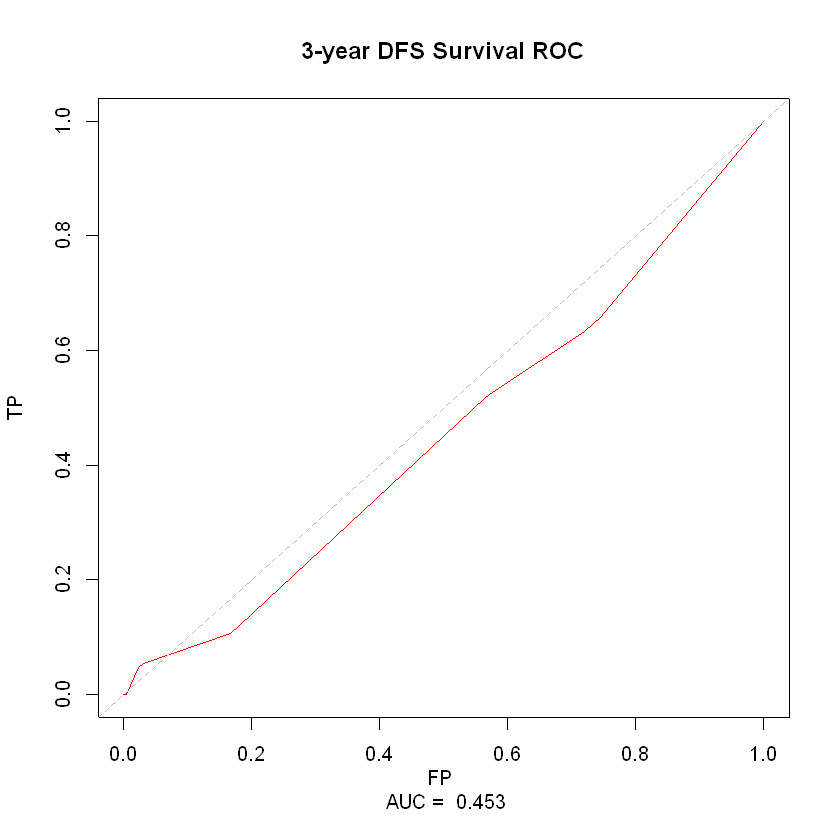

In [29]:
plot(data3$FP, data3$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data3$AUC,3)), ##连接
     ylab="TP",
     main="3-year DFS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [30]:
data3= survivalROC(  Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$CSDFS,     
                     predict.time =  cutoff, method="KM")
str(data3)

List of 6
 $ cut.values  : num [1:11] -Inf -0.2625 -0.2223 -0.1047 -0.0645 ...
 $ TP          : num [1:11] 1 0.656 0.66 0.555 0.557 ...
 $ FP          : num [1:11] 1 0.745 0.718 0.574 0.562 ...
 $ predict.time: num 1095
 $ Survival    : num 0.926
 $ AUC         : num 0.473


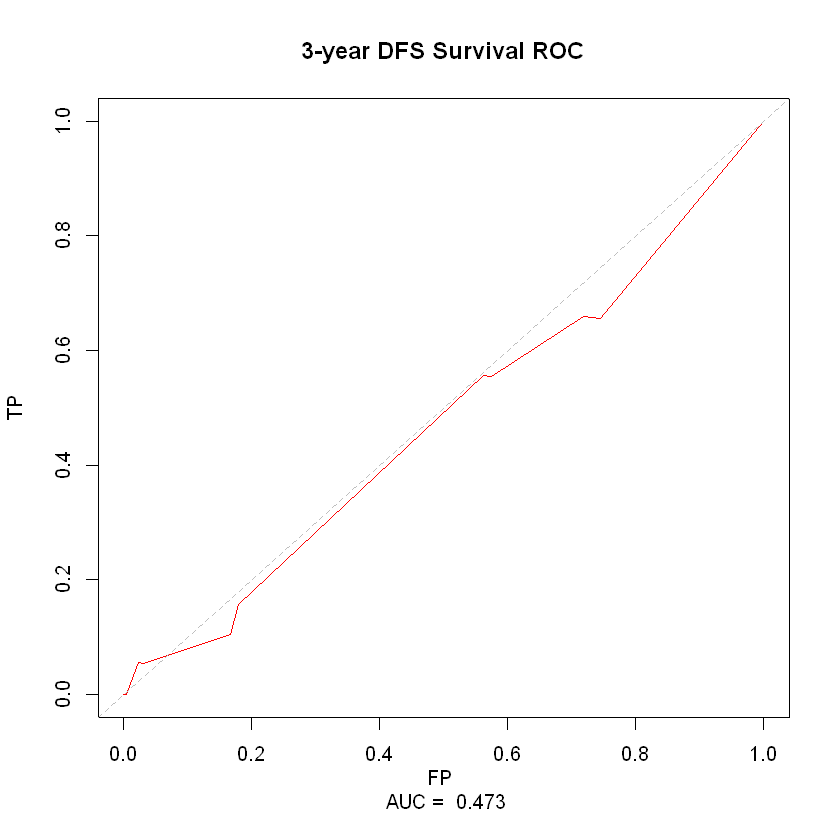

In [31]:
plot(data3$FP, data3$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data3$AUC,3)), 
     ylab="TP",
     main="3-year DFS Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [32]:
cutoff=1095 #730, 1095, 1825, 2555, 3650
data3= survivalROC(  Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$RSDFS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data3)## list结构

List of 6
 $ cut.values  : num [1:284] -Inf -0.788 -0.746 -0.543 -0.542 ...
 $ TP          : num [1:284] 1 0.995 0.99 0.986 0.981 ...
 $ FP          : num [1:284] 1 0.997 0.993 0.99 0.986 ...
 $ predict.time: num 1095
 $ Survival    : num 0.926
 $ AUC         : num 0.529


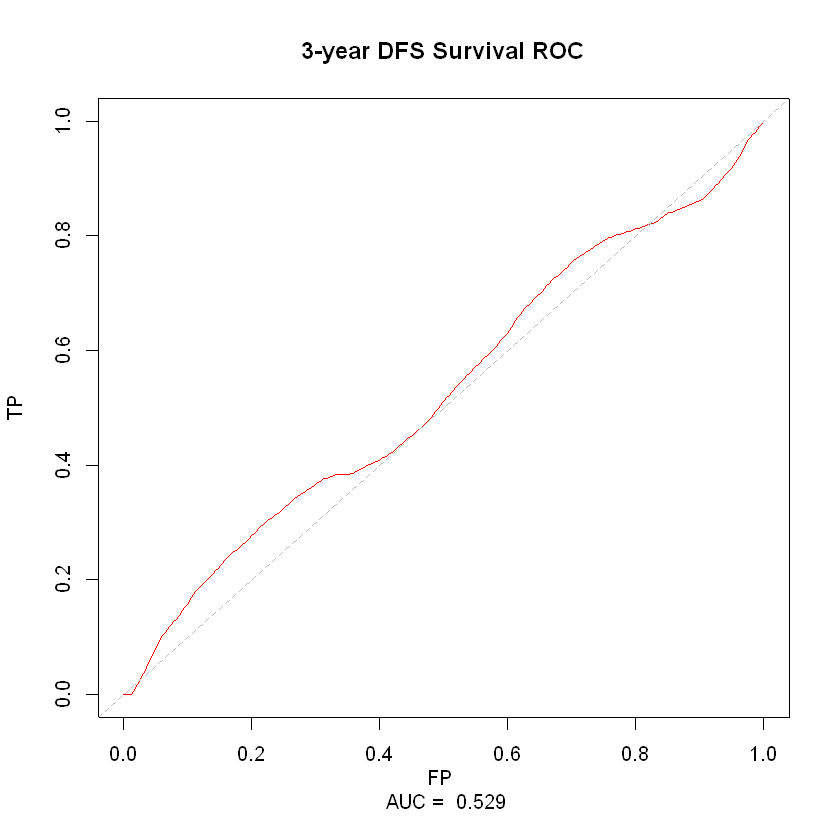

In [33]:
plot(data3$FP, data3$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data3$AUC,3)), ##连接
     ylab="TP",
     main="3-year DFS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [34]:
data3= survivalROC(  Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$RSDFS,     
                     predict.time =  cutoff, method="KM")
str(data3)

List of 6
 $ cut.values  : num [1:284] -Inf -0.788 -0.746 -0.543 -0.542 ...
 $ TP          : num [1:284] 1 1 1 1 1 ...
 $ FP          : num [1:284] 1 0.996 0.992 0.988 0.985 ...
 $ predict.time: num 1095
 $ Survival    : num 0.926
 $ AUC         : num 0.566


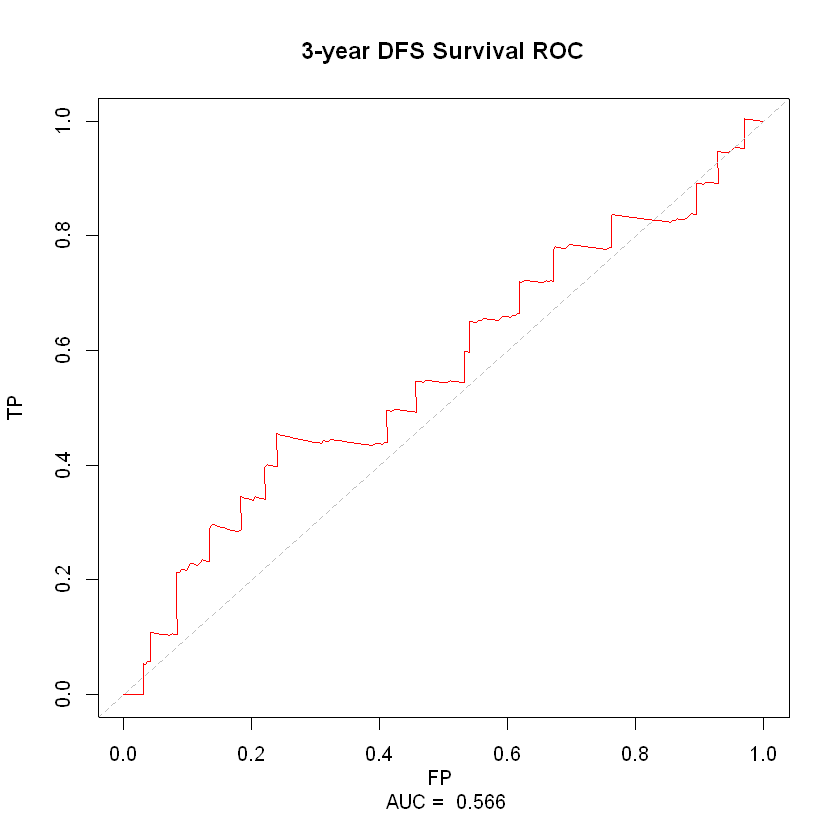

In [35]:
plot(data3$FP, data3$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data3$AUC,3)), 
     ylab="TP",
     main="3-year DFS Survival ROC")
abline(0,1,col="gray",lty=2)

# 5-year OS

### Clinical Score

In [36]:
cutoff=1825 #730, 1095, 1825, 2555, 3650
data5= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$CSOS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data5)## list结构

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 0.953 0.939 0.907 0.716 ...
 $ FP          : num [1:20] 1 0.924 0.909 0.877 0.712 ...
 $ predict.time: num 1825
 $ Survival    : num 0.554
 $ AUC         : num 0.524


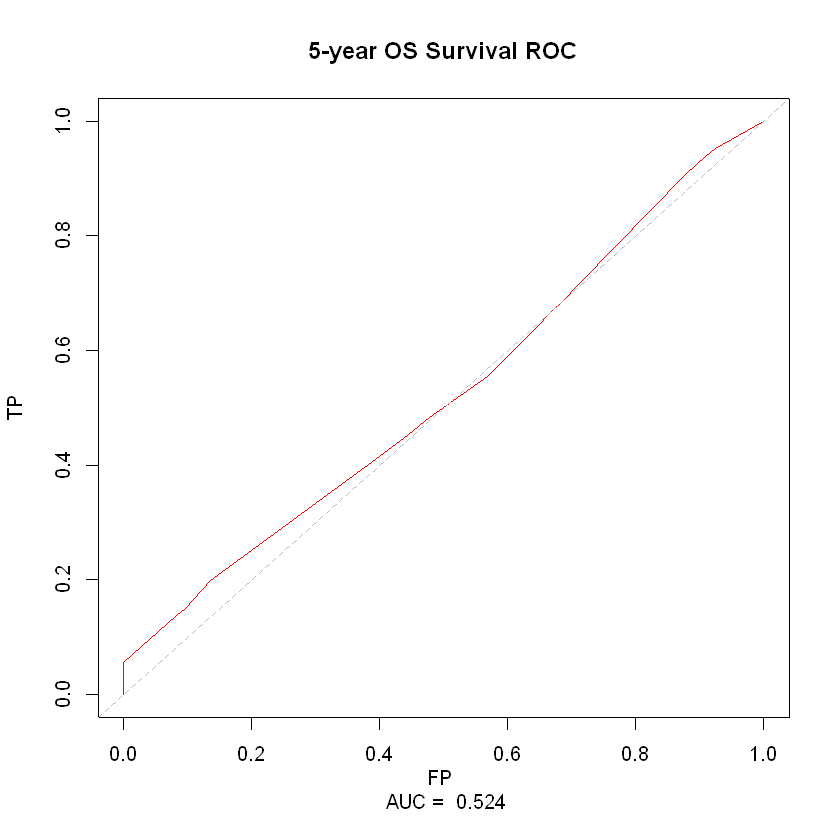

In [37]:
plot(data5$FP, data5$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data5$AUC,3)), ##连接
     ylab="TP",
     main="5-year OS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [38]:
data5= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$CSOS,     
                     predict.time =  cutoff, method="KM")
str(data5)

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 0.94 0.933 0.915 0.727 ...
 $ FP          : num [1:20] 1 0.934 0.914 0.871 0.703 ...
 $ predict.time: num 1825
 $ Survival    : num 0.554
 $ AUC         : num 0.535


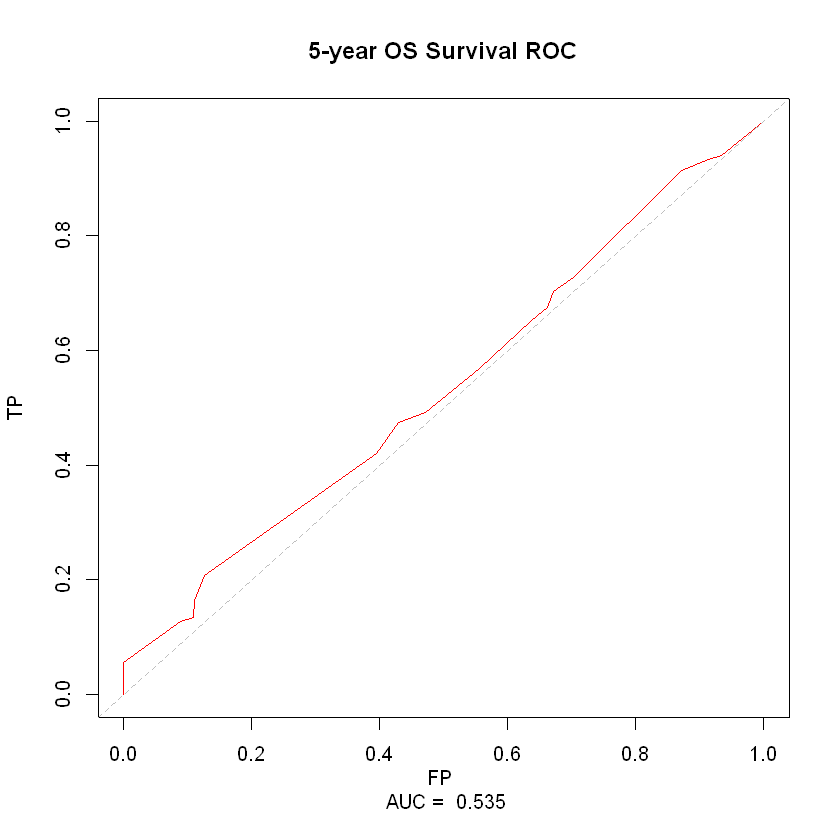

In [39]:
plot(data5$FP, data5$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data5$AUC,3)), 
     ylab="TP",
     main="5-year OS Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [40]:
cutoff=1825 #730, 1095, 1825, 2555, 3650
data5= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$RSOS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data5)## list结构

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 0.998 0.995 0.993 0.99 ...
 $ FP          : num [1:284] 1 0.996 0.991 0.987 0.982 ...
 $ predict.time: num 1825
 $ Survival    : num 0.554
 $ AUC         : num 0.624


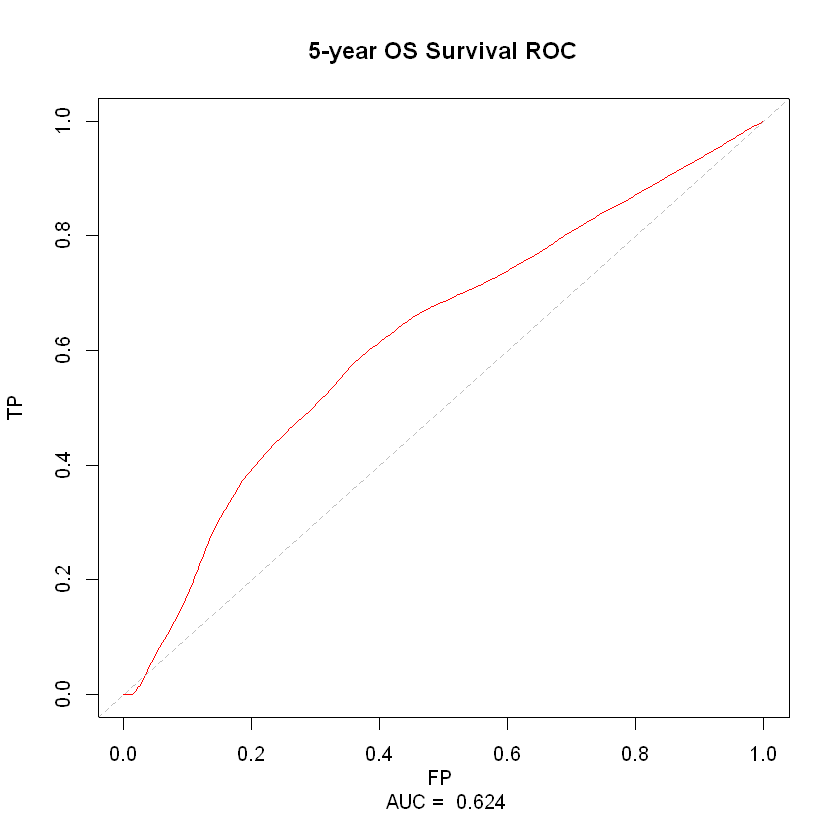

In [41]:
plot(data5$FP, data5$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data5$AUC,3)), ##连接
     ylab="TP",
     main="5-year OS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [42]:
data5= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$RSOS,     
                     predict.time =  cutoff, method="KM")
str(data5)

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 1 1 1 1 ...
 $ FP          : num [1:284] 1 0.993 0.986 0.98 0.973 ...
 $ predict.time: num 1825
 $ Survival    : num 0.554
 $ AUC         : num 0.63


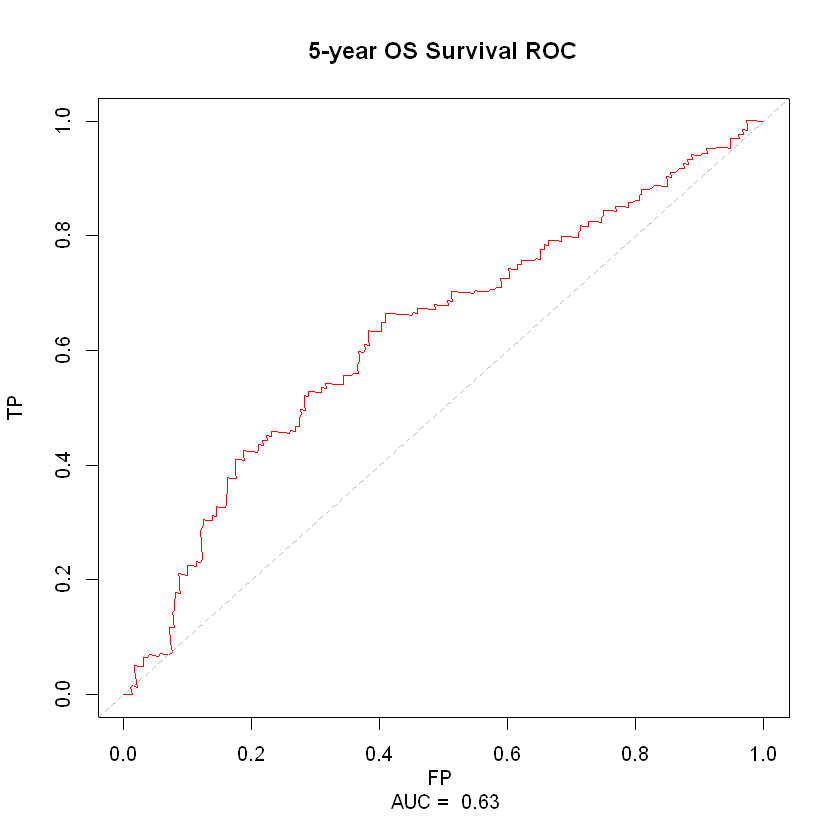

In [43]:
plot(data5$FP, data5$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data5$AUC,3)), 
     ylab="TP",
     main="5-year OS Survival ROC")
abline(0,1,col="gray",lty=2)

# 5-year DFS

### Clinical Score

In [44]:
cutoff=1825 #730, 1095, 1825, 2555, 3650
data5= survivalROC(  Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$CSDFS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data5)## list结构

List of 6
 $ cut.values  : num [1:11] -Inf -0.2625 -0.2223 -0.1047 -0.0645 ...
 $ TP          : num [1:11] 1 0.737 0.715 0.582 0.572 ...
 $ FP          : num [1:11] 1 0.739 0.713 0.565 0.554 ...
 $ predict.time: num 1825
 $ Survival    : num 0.561
 $ AUC         : num 0.533


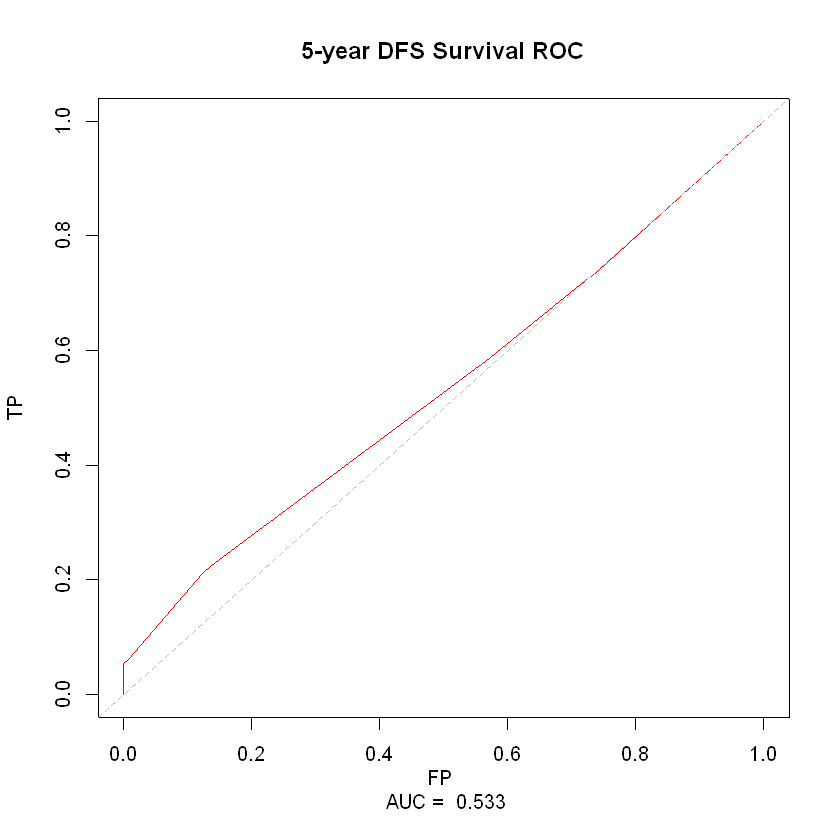

In [45]:
plot(data5$FP, data5$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data5$AUC,3)), ##连接
     ylab="TP",
     main="5-year DFS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [46]:
data5= survivalROC(  Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$CSDFS,     
                     predict.time =  cutoff, method="KM")
str(data5)

List of 6
 $ cut.values  : num [1:11] -Inf -0.2625 -0.2223 -0.1047 -0.0645 ...
 $ TP          : num [1:11] 1 0.731 0.735 0.6 0.583 ...
 $ FP          : num [1:11] 1 0.744 0.697 0.551 0.545 ...
 $ predict.time: num 1825
 $ Survival    : num 0.561
 $ AUC         : num 0.538


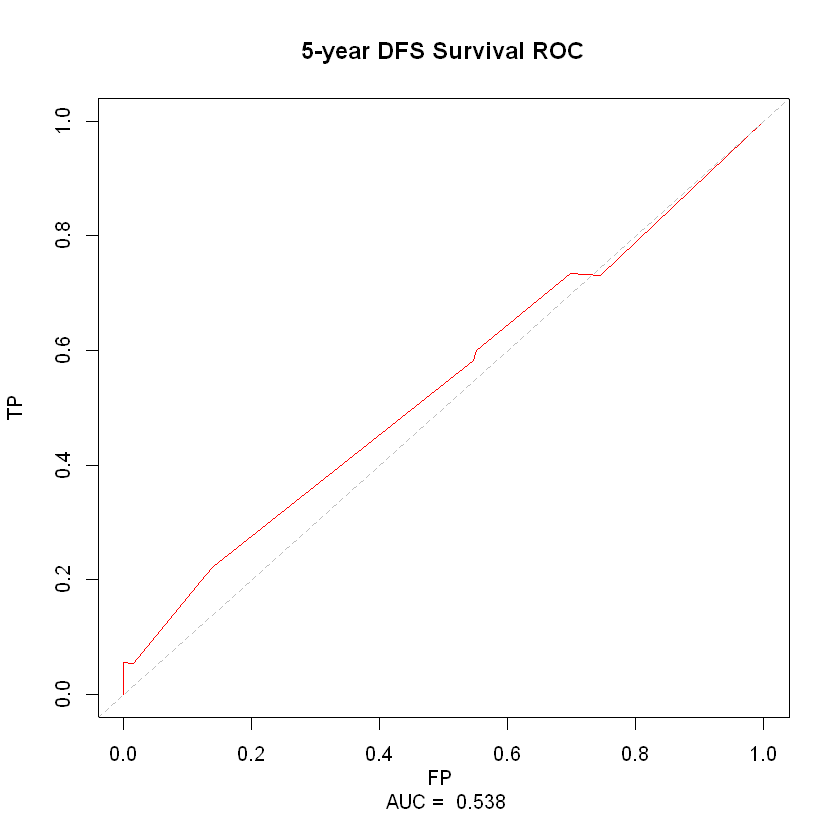

In [47]:
plot(data5$FP, data5$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data5$AUC,3)), 
     ylab="TP",
     main="5-year DFS Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [48]:
cutoff=1825 #730, 1095, 1825, 2555, 3650
data5= survivalROC(  Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$RSDFS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data5)## list结构

List of 6
 $ cut.values  : num [1:284] -Inf -0.788 -0.746 -0.543 -0.542 ...
 $ TP          : num [1:284] 1 0.996 0.993 0.99 0.986 ...
 $ FP          : num [1:284] 1 0.996 0.993 0.989 0.985 ...
 $ predict.time: num 1825
 $ Survival    : num 0.561
 $ AUC         : num 0.566


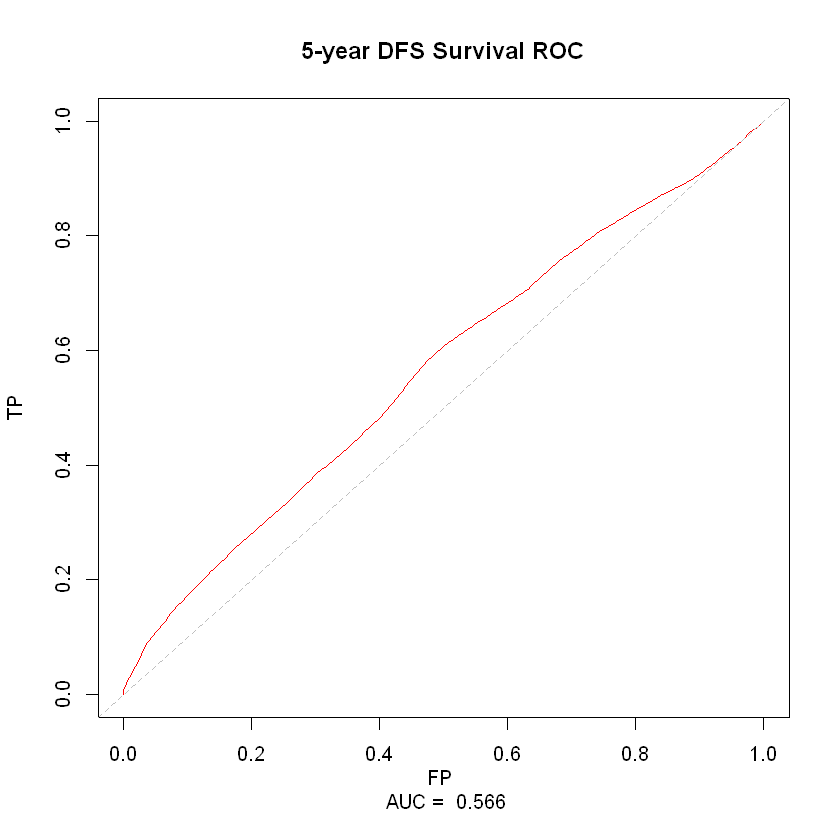

In [49]:
plot(data5$FP, data5$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data5$AUC,3)), ##连接
     ylab="TP",
     main="5-year DFS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [50]:
data5= survivalROC(  Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$RSDFS,     
                     predict.time =  cutoff, method="KM")
str(data5)

List of 6
 $ cut.values  : num [1:284] -Inf -0.788 -0.746 -0.543 -0.542 ...
 $ TP          : num [1:284] 1 1.001 1.001 1.002 0.993 ...
 $ FP          : num [1:284] 1 0.993 0.986 0.979 0.98 ...
 $ predict.time: num 1825
 $ Survival    : num 0.561
 $ AUC         : num 0.575


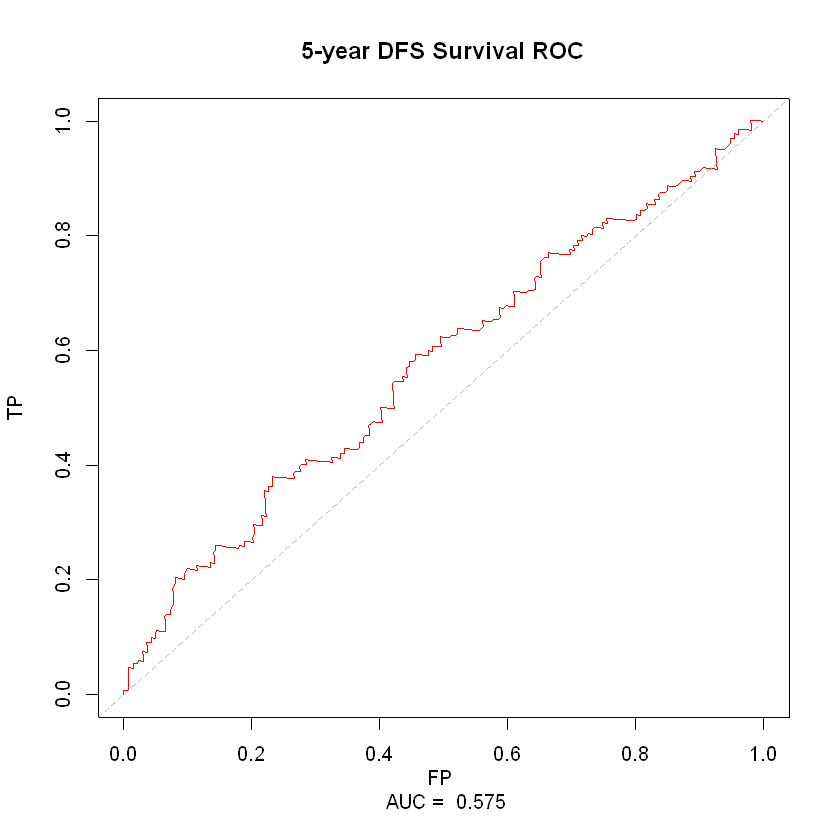

In [51]:
plot(data5$FP, data5$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data5$AUC,3)), 
     ylab="TP",
     main="5-year DFS Survival ROC")
abline(0,1,col="gray",lty=2)

# 7-year OS

### Clinical Score

In [52]:
cutoff=2555 #730, 1095, 1825, 2555, 3650
data7= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$CSOS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data7)## list结构

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 0.942 0.928 0.896 0.717 ...
 $ FP          : num [1:20] 1 0.915 0.9 0.869 0.702 ...
 $ predict.time: num 2555
 $ Survival    : num 0.208
 $ AUC         : num 0.502


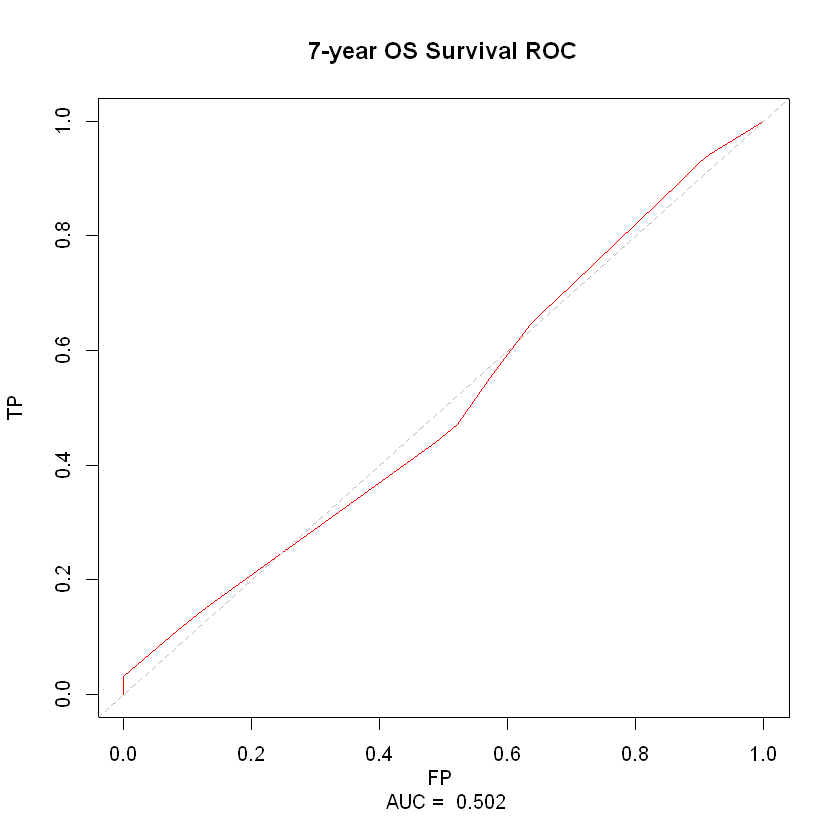

In [53]:
plot(data7$FP, data7$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data7$AUC,3)), ##连接
     ylab="TP",
     main="7-year OS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [54]:
data7= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$CSOS,     
                     predict.time =  cutoff, method="KM")
str(data7)

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 0.937 0.929 0.897 0.717 ...
 $ FP          : num [1:20] 1 0.934 0.897 0.864 0.701 ...
 $ predict.time: num 2555
 $ Survival    : num 0.208
 $ AUC         : num 0.504


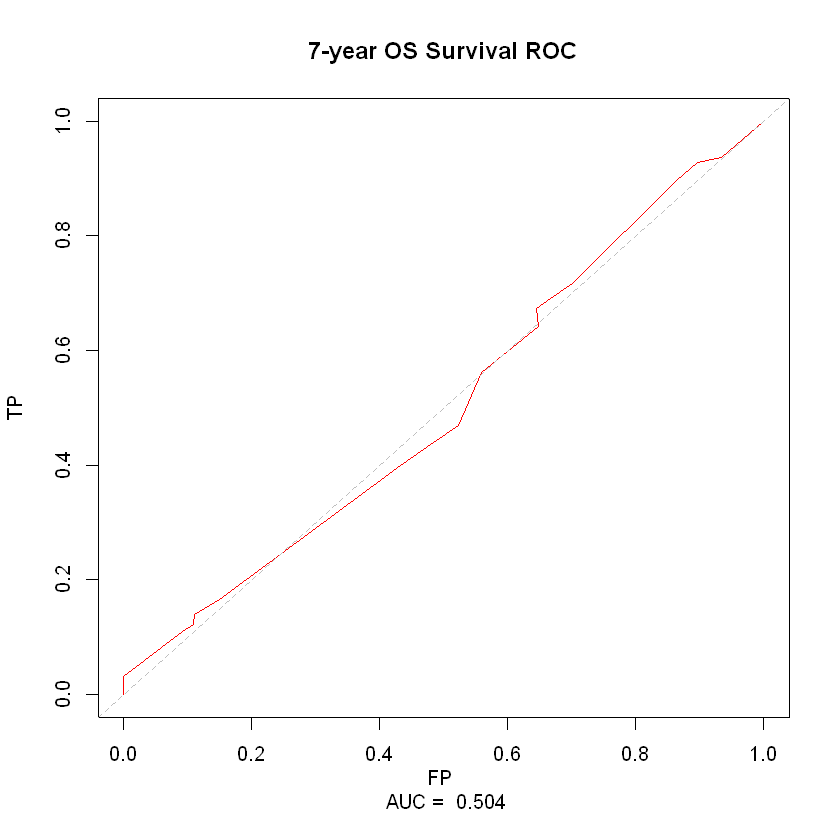

In [55]:
plot(data7$FP, data7$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data7$AUC,3)), 
     ylab="TP",
     main="7-year OS Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [56]:
cutoff=2555 #730, 1095, 1825, 2555, 3650
data7= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$RSOS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data7)## list结构

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 0.997 0.995 0.992 0.989 ...
 $ FP          : num [1:284] 1 0.993 0.986 0.979 0.972 ...
 $ predict.time: num 2555
 $ Survival    : num 0.208
 $ AUC         : num 0.53


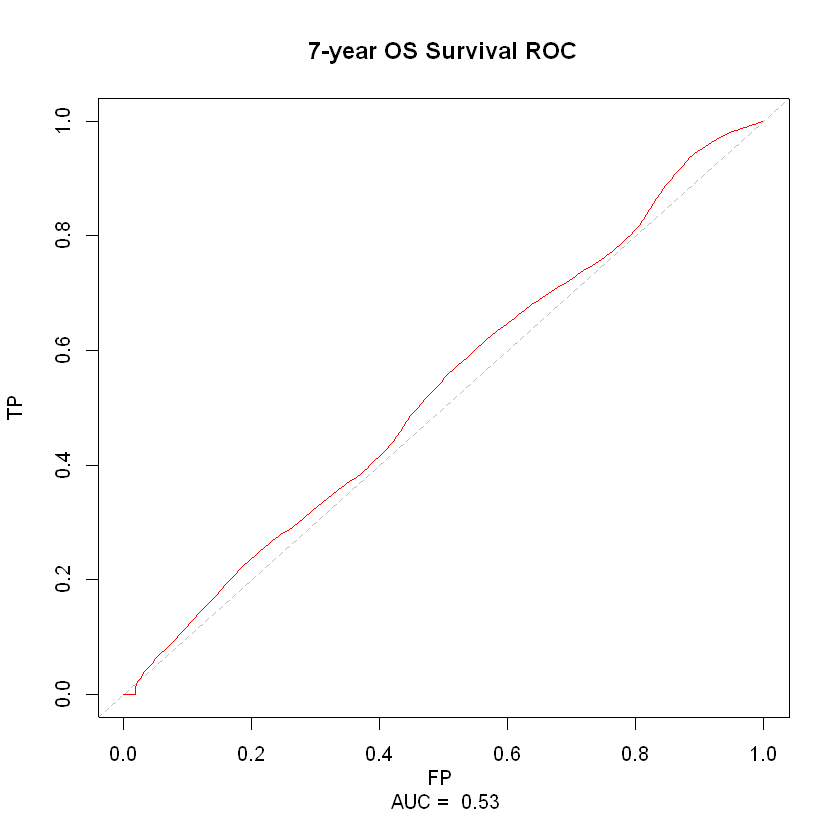

In [57]:
plot(data7$FP, data7$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data7$AUC,3)), ##连接
     ylab="TP",
     main="7-year OS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [58]:
data7= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$RSOS,     
                     predict.time =  cutoff, method="KM")
str(data7)

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 1 1 1 1 ...
 $ FP          : num [1:284] 1 0.981 0.962 0.943 0.924 ...
 $ predict.time: num 2555
 $ Survival    : num 0.208
 $ AUC         : num 0.574


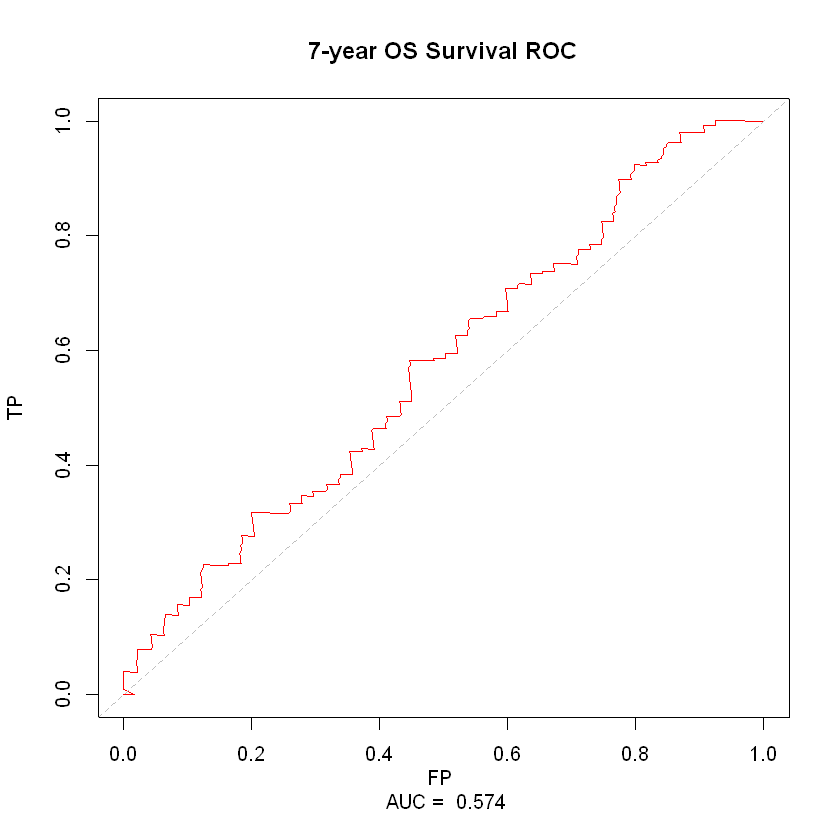

In [59]:
plot(data7$FP, data7$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data7$AUC,3)), 
     ylab="TP",
     main="7-year OS Survival ROC")
abline(0,1,col="gray",lty=2)

# 7-year DFS

### Clinical Score

In [60]:
cutoff=2555 #730, 1095, 1825, 2555, 3650
data7= survivalROC(  Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$CSDFS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data7)## list结构

List of 6
 $ cut.values  : num [1:11] -Inf -0.2625 -0.2223 -0.1047 -0.0645 ...
 $ TP          : num [1:11] 1 0.728 0.704 0.574 0.564 ...
 $ FP          : num [1:11] 1 0.78 0.751 0.565 0.553 ...
 $ predict.time: num 2555
 $ Survival    : num 0.221
 $ AUC         : num 0.502


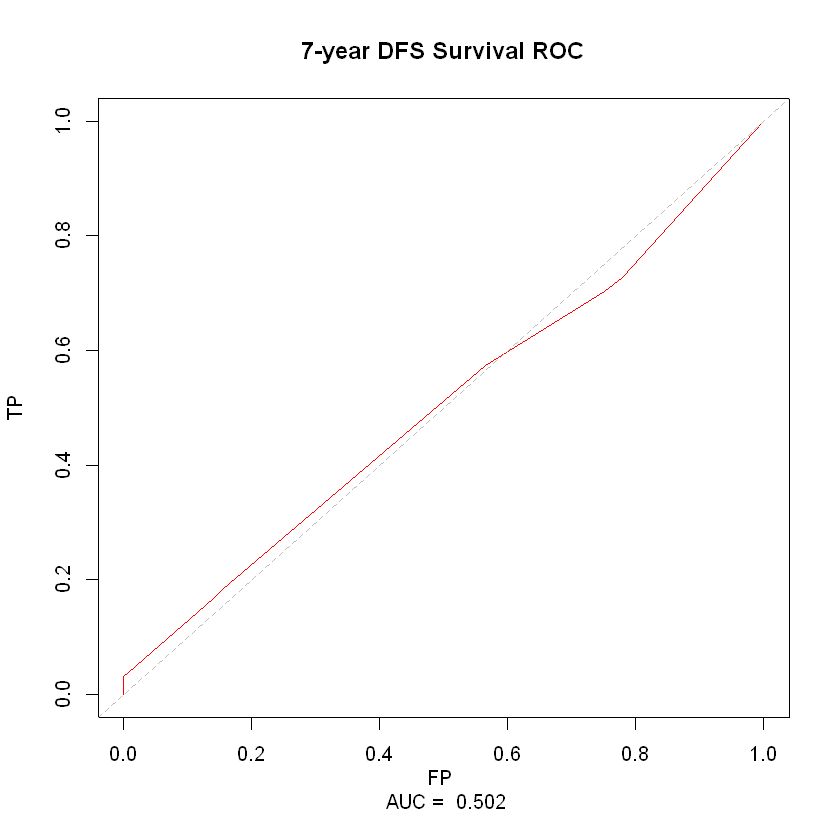

In [61]:
plot(data7$FP, data7$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data7$AUC,3)), ##连接
     ylab="TP",
     main="7-year DFS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [62]:
data7= survivalROC(  Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$CSDFS,     
                     predict.time =  cutoff, method="KM")
str(data7)

List of 6
 $ cut.values  : num [1:11] -Inf -0.2625 -0.2223 -0.1047 -0.0645 ...
 $ TP          : num [1:11] 1 0.725 0.713 0.582 0.568 ...
 $ FP          : num [1:11] 1 0.787 0.715 0.537 0.539 ...
 $ predict.time: num 2555
 $ Survival    : num 0.221
 $ AUC         : num 0.508


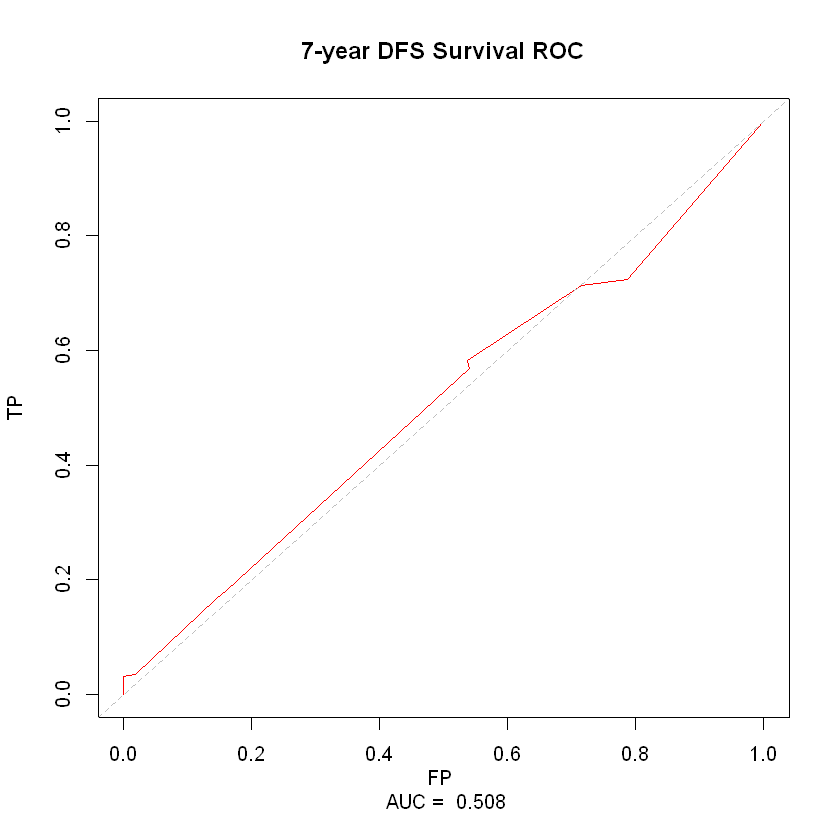

In [63]:
plot(data7$FP, data7$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data7$AUC,3)), 
     ylab="TP",
     main="7-year DFS Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [64]:
cutoff=2555 #730, 1095, 1825, 2555, 3650
data7= survivalROC(  Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$RSDFS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data7)## list结构

List of 6
 $ cut.values  : num [1:284] -Inf -0.788 -0.746 -0.543 -0.542 ...
 $ TP          : num [1:284] 1 0.997 0.995 0.992 0.989 ...
 $ FP          : num [1:284] 1 0.993 0.986 0.979 0.972 ...
 $ predict.time: num 2555
 $ Survival    : num 0.221
 $ AUC         : num 0.615


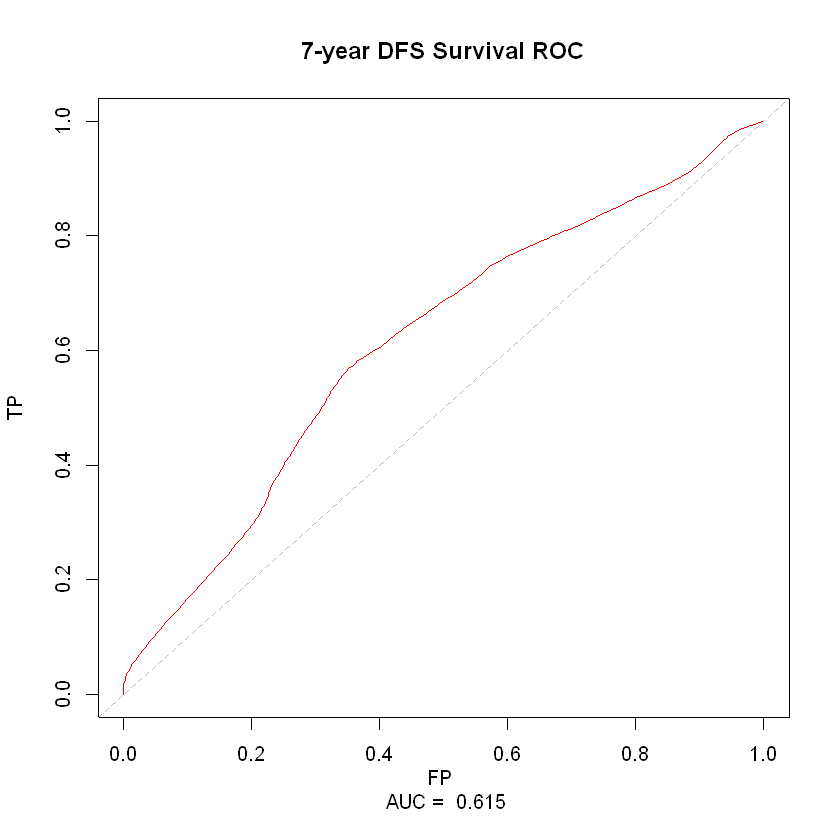

In [65]:
plot(data7$FP, data7$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data7$AUC,3)), ##连接
     ylab="TP",
     main="7-year DFS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [66]:
data7= survivalROC(  Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$RSDFS,     
                     predict.time =  cutoff, method="KM")
str(data7)

List of 6
 $ cut.values  : num [1:284] -Inf -0.788 -0.746 -0.543 -0.542 ...
 $ TP          : num [1:284] 1 1.001 1.002 1.002 0.998 ...
 $ FP          : num [1:284] 1 0.981 0.963 0.944 0.944 ...
 $ predict.time: num 2555
 $ Survival    : num 0.221
 $ AUC         : num 0.624


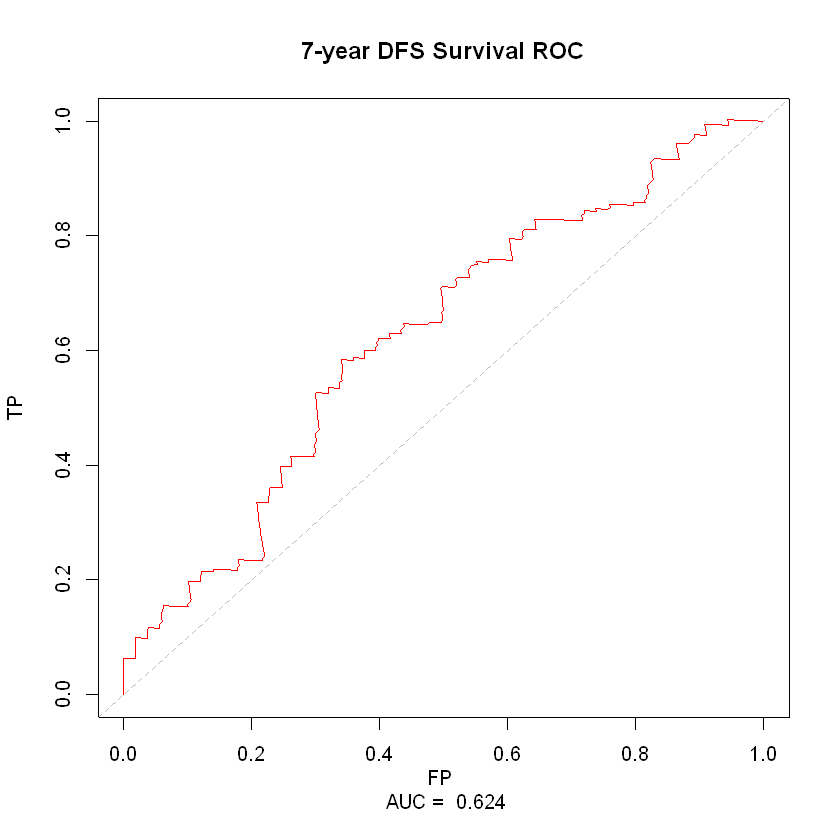

In [67]:
plot(data7$FP, data7$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data7$AUC,3)), 
     ylab="TP",
     main="7-year DFS Survival ROC")
abline(0,1,col="gray",lty=2)

# 10-year OS

### Clinical Score

In [68]:
cutoff=3650 #730, 1095, 1825, 2555, 3650
data10= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$CSOS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data10)## list结构

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 0.936 0.922 0.889 0.711 ...
 $ FP          : num [1:20] 1 1 1 1 1 ...
 $ predict.time: num 3650
 $ Survival    : num 0.00815
 $ AUC         : num 0.417


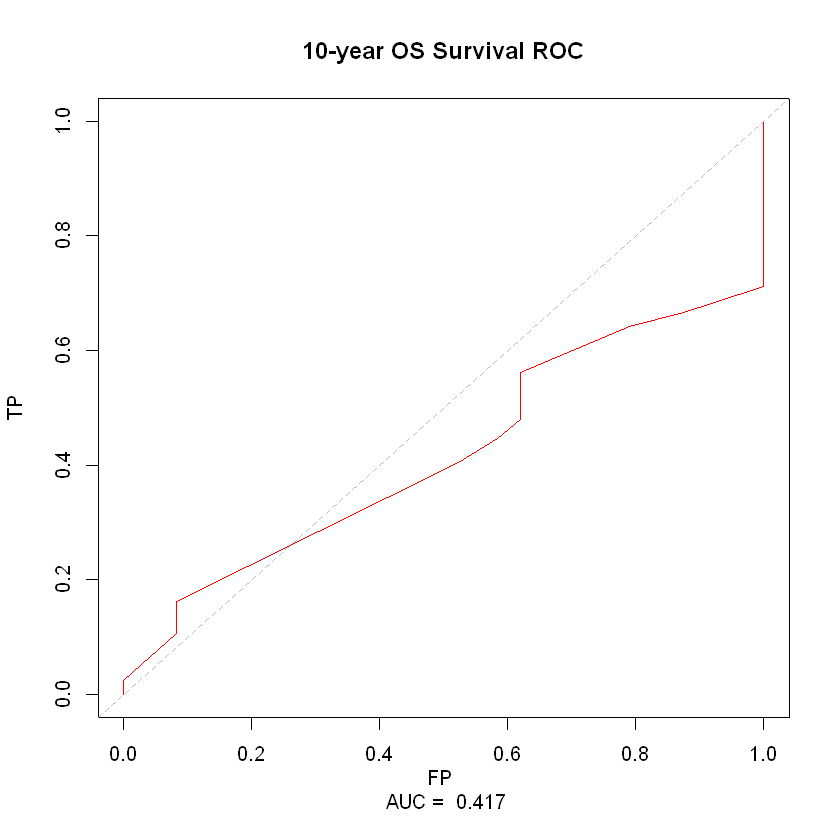

In [69]:
plot(data10$FP, data10$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data10$AUC,3)), ##连接
     ylab="TP",
     main="10-year OS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [70]:
data10= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$CSOS,     
                     predict.time =  cutoff, method="KM")
str(data10)

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 0.936 0.922 0.89 0.712 ...
 $ FP          : num [1:20] 1 0.992 0.994 0.979 0.966 ...
 $ predict.time: num 3650
 $ Survival    : num 0.00815
 $ AUC         : num 0.493


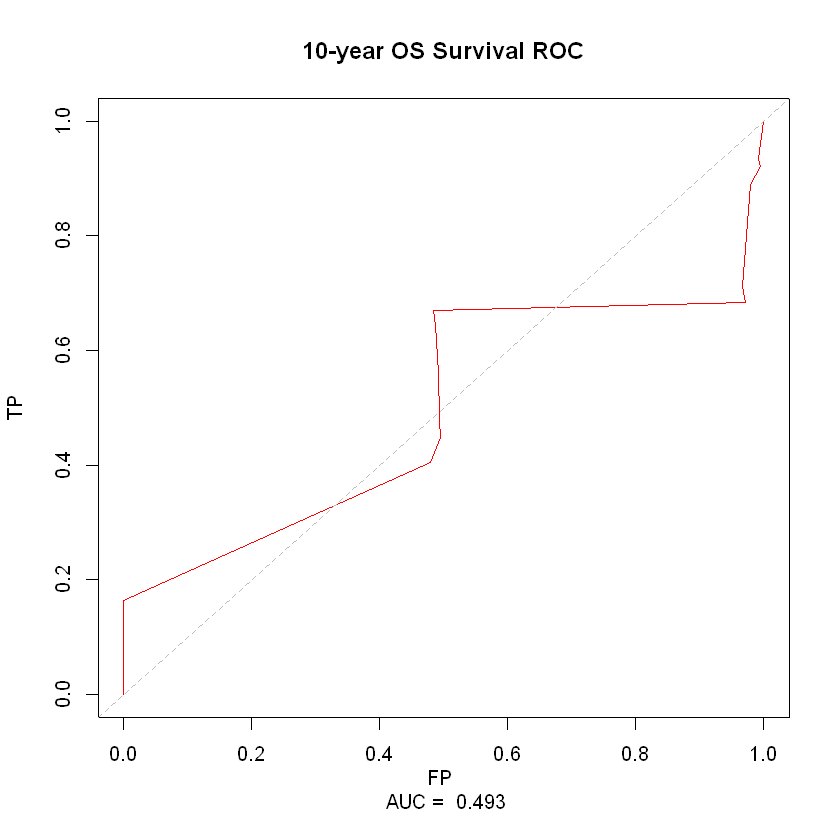

In [71]:
plot(data10$FP, data10$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data10$AUC,3)), 
     ylab="TP",
     main="10-year OS Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [72]:
cutoff=3650 #730, 1095, 1825, 2555, 3650
data10= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$RSOS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data10)## list结构

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 0.997 0.993 0.99 0.986 ...
 $ FP          : num [1:284] 1 0.983 0.966 0.95 0.935 ...
 $ predict.time: num 3650
 $ Survival    : num 0.00815
 $ AUC         : num 0.625


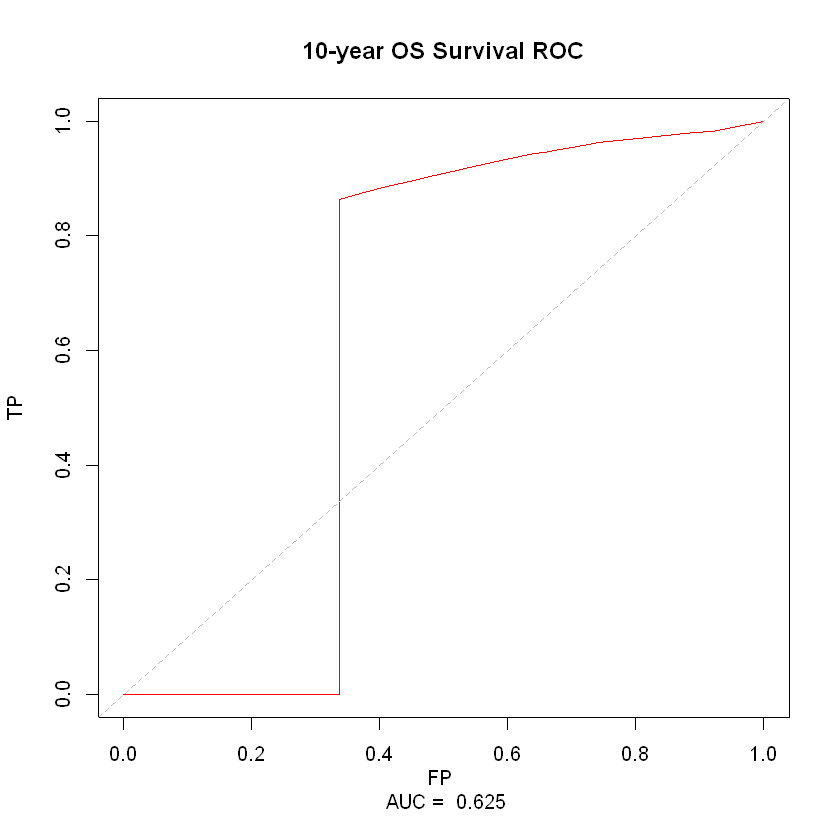

In [73]:
plot(data10$FP, data10$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data10$AUC,3)), ##连接
     ylab="TP",
     main="10-year OS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [74]:
data10= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$RSOS,     
                     predict.time =  cutoff, method="KM")
str(data10)

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 0.996 0.993 0.989 0.986 ...
 $ FP          : num [1:284] 1 1 1 1 1 ...
 $ predict.time: num 3650
 $ Survival    : num 0.00815
 $ AUC         : num 0.94


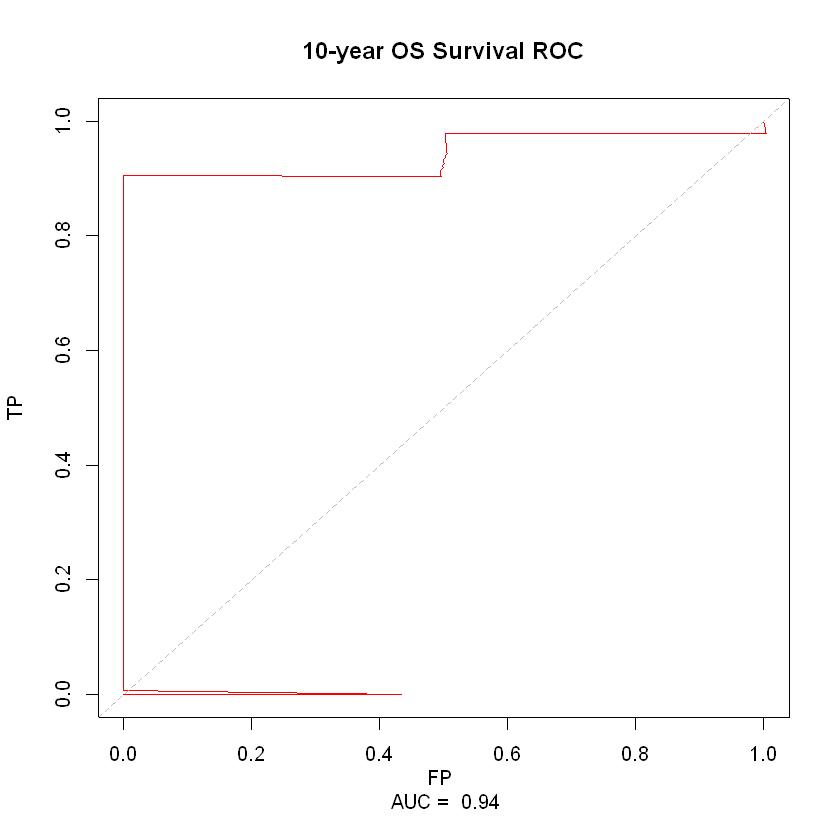

In [75]:
plot(data10$FP, data10$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data10$AUC,3)), 
     ylab="TP",
     main="10-year OS Survival ROC")
abline(0,1,col="gray",lty=2)

# 10-year DFS

### Clinical Score

In [76]:
cutoff=3650 #730, 1095, 1825, 2555, 3650
data10= survivalROC( Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$CSDFS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data10)## list结构

List of 6
 $ cut.values  : num [1:11] -Inf -0.2625 -0.2223 -0.1047 -0.0645 ...
 $ TP          : num [1:11] 1 0.736 0.711 0.573 0.563 ...
 $ FP          : num [1:11] 1 1 0.974 0.499 0.481 ...
 $ predict.time: num 3650
 $ Survival    : num 0.00929
 $ AUC         : num 0.508


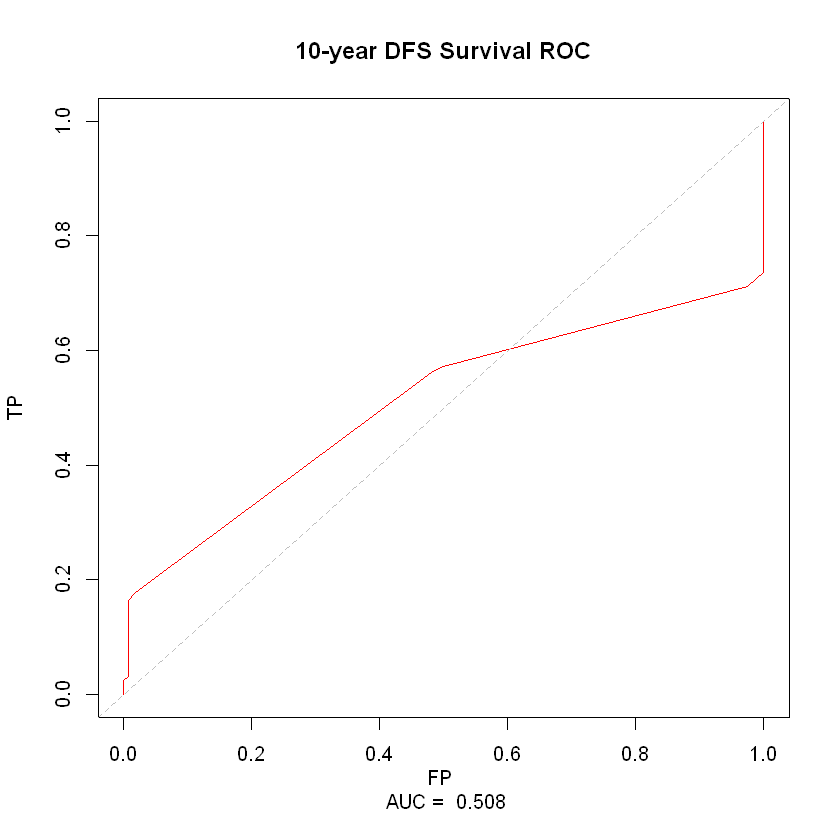

In [77]:
plot(data10$FP, data10$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data10$AUC,3)), ##连接
     ylab="TP",
     main="10-year DFS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [78]:
data10= survivalROC( Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$CSDFS,     
                     predict.time =  cutoff, method="KM")
str(data10)

List of 6
 $ cut.values  : num [1:11] -Inf -0.2625 -0.2223 -0.1047 -0.0645 ...
 $ TP          : num [1:11] 1 0.736 0.711 0.573 0.563 ...
 $ FP          : num [1:11] 1 0.984 0.997 0.483 0.485 ...
 $ predict.time: num 3650
 $ Survival    : num 0.00929
 $ AUC         : num 0.513


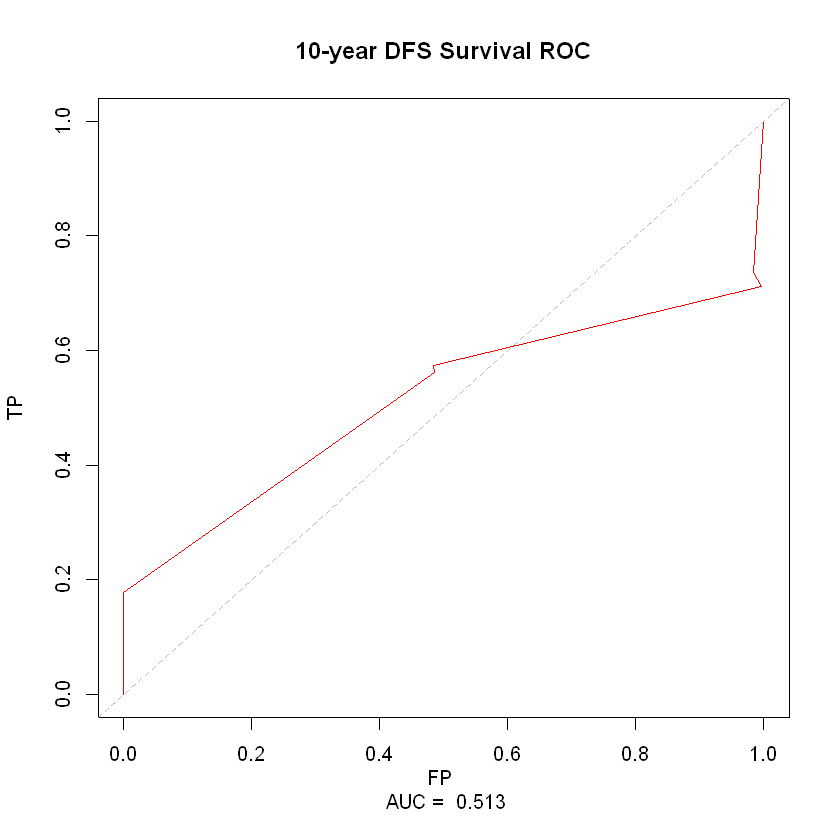

In [79]:
plot(data10$FP, data10$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data10$AUC,3)), 
     ylab="TP",
     main="10-year DFS Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [80]:
cutoff=3650 #730, 1095, 1825, 2555, 3650
data10= survivalROC(  Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$RSDFS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data10)## list结构

List of 6
 $ cut.values  : num [1:284] -Inf -0.788 -0.746 -0.543 -0.542 ...
 $ TP          : num [1:284] 1 0.997 0.994 0.99 0.987 ...
 $ FP          : num [1:284] 1 0.937 0.878 0.818 0.758 ...
 $ predict.time: num 3650
 $ Survival    : num 0.00929
 $ AUC         : num 0.966


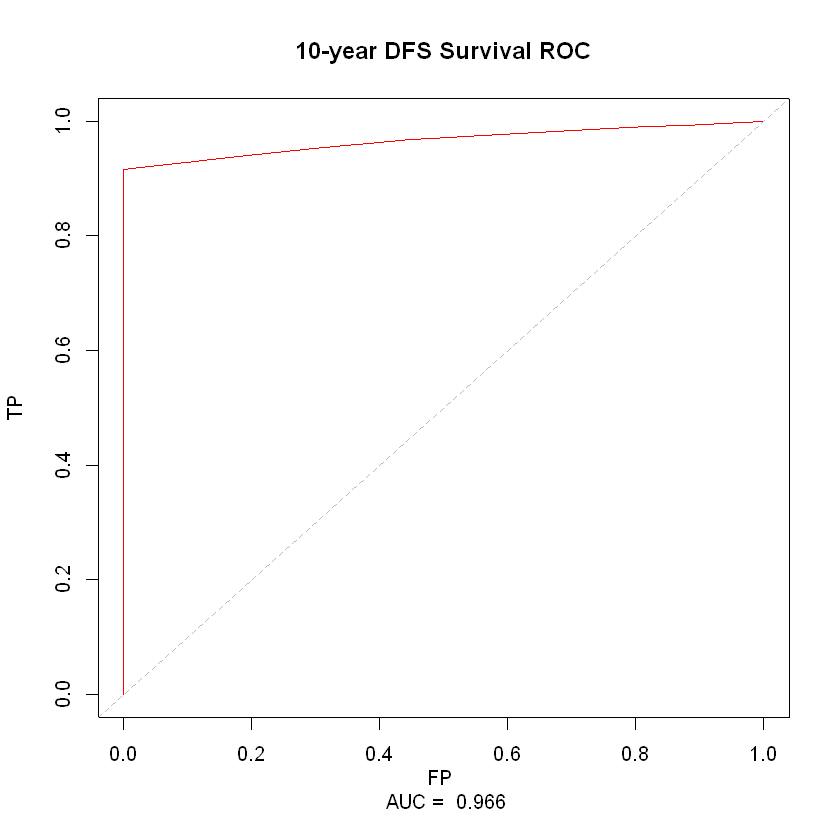

In [81]:
plot(data10$FP, data10$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data10$AUC,3)), ##连接
     ylab="TP",
     main="10-year DFS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [82]:
data10= survivalROC(  Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$RSDFS,     
                     predict.time =  cutoff, method="KM")
str(data10)

List of 6
 $ cut.values  : num [1:284] -Inf -0.788 -0.746 -0.543 -0.542 ...
 $ TP          : num [1:284] 1 0.996 0.993 0.994 0.99 ...
 $ FP          : num [1:284] 1 1.002 1.005 0.505 0.505 ...
 $ predict.time: num 3650
 $ Survival    : num 0.00929
 $ AUC         : num 0.97


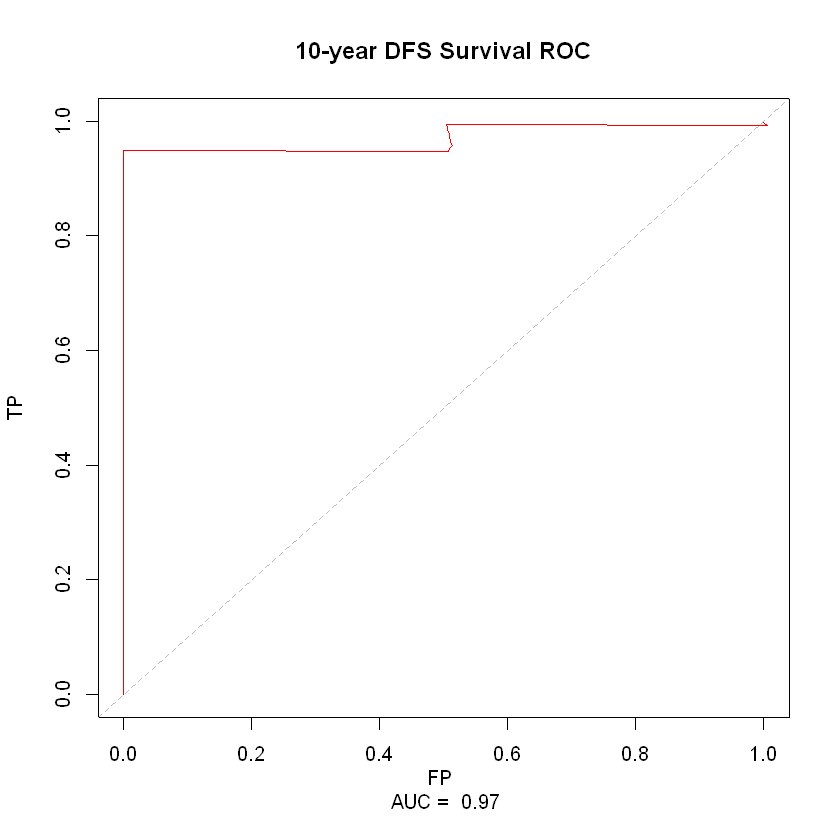

In [83]:
plot(data10$FP, data10$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data10$AUC,3)), 
     ylab="TP",
     main="10-year DFS Survival ROC")
abline(0,1,col="gray",lty=2)